In [144]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [145]:
base=pd.read_csv('../../Dataset/BSinfo.csv')
cell=pd.read_csv('../../Dataset/CLdata.csv')
energy=pd.read_csv('../../Dataset/ECdata.csv')
submit=pd.read_csv("../../Dataset/PCprediction.csv")

In [146]:
energy

,Time,BS,Energy
0,1/1/2023 1:00,B_0,64.275037
1,1/1/2023 2:00,B_0,55.904335
2,1/1/2023 3:00,B_0,57.698057
3,1/1/2023 4:00,B_0,55.156951
4,1/1/2023 5:00,B_0,56.053812
...,...,...,...
92624,1/2/2023 17:00,B_1018,14.648729
92625,1/2/2023 18:00,B_1018,14.648729
92626,1/2/2023 21:00,B_1018,13.452915
92627,1/2/2023 22:00,B_1018,13.602392


In [147]:
energy['Time'] = pd.to_datetime(energy['Time'])
energy

,Time,BS,Energy
0,2023-01-01 01:00:00,B_0,64.275037
1,2023-01-01 02:00:00,B_0,55.904335
2,2023-01-01 03:00:00,B_0,57.698057
3,2023-01-01 04:00:00,B_0,55.156951
4,2023-01-01 05:00:00,B_0,56.053812
...,...,...,...
92624,2023-01-02 17:00:00,B_1018,14.648729
92625,2023-01-02 18:00:00,B_1018,14.648729
92626,2023-01-02 21:00:00,B_1018,13.452915
92627,2023-01-02 22:00:00,B_1018,13.602392


In [148]:
df=energy[energy['BS']=='B_0']
df

,Time,BS,Energy
0,2023-01-01 01:00:00,B_0,64.275037
1,2023-01-01 02:00:00,B_0,55.904335
2,2023-01-01 03:00:00,B_0,57.698057
3,2023-01-01 04:00:00,B_0,55.156951
4,2023-01-01 05:00:00,B_0,56.053812
...,...,...,...
108,2023-01-07 06:00:00,B_0,62.780269
109,2023-01-07 09:00:00,B_0,74.738416
110,2023-01-07 15:00:00,B_0,68.161435
111,2023-01-07 17:00:00,B_0,79.372197


In [149]:
df.set_index('Time',inplace=True)

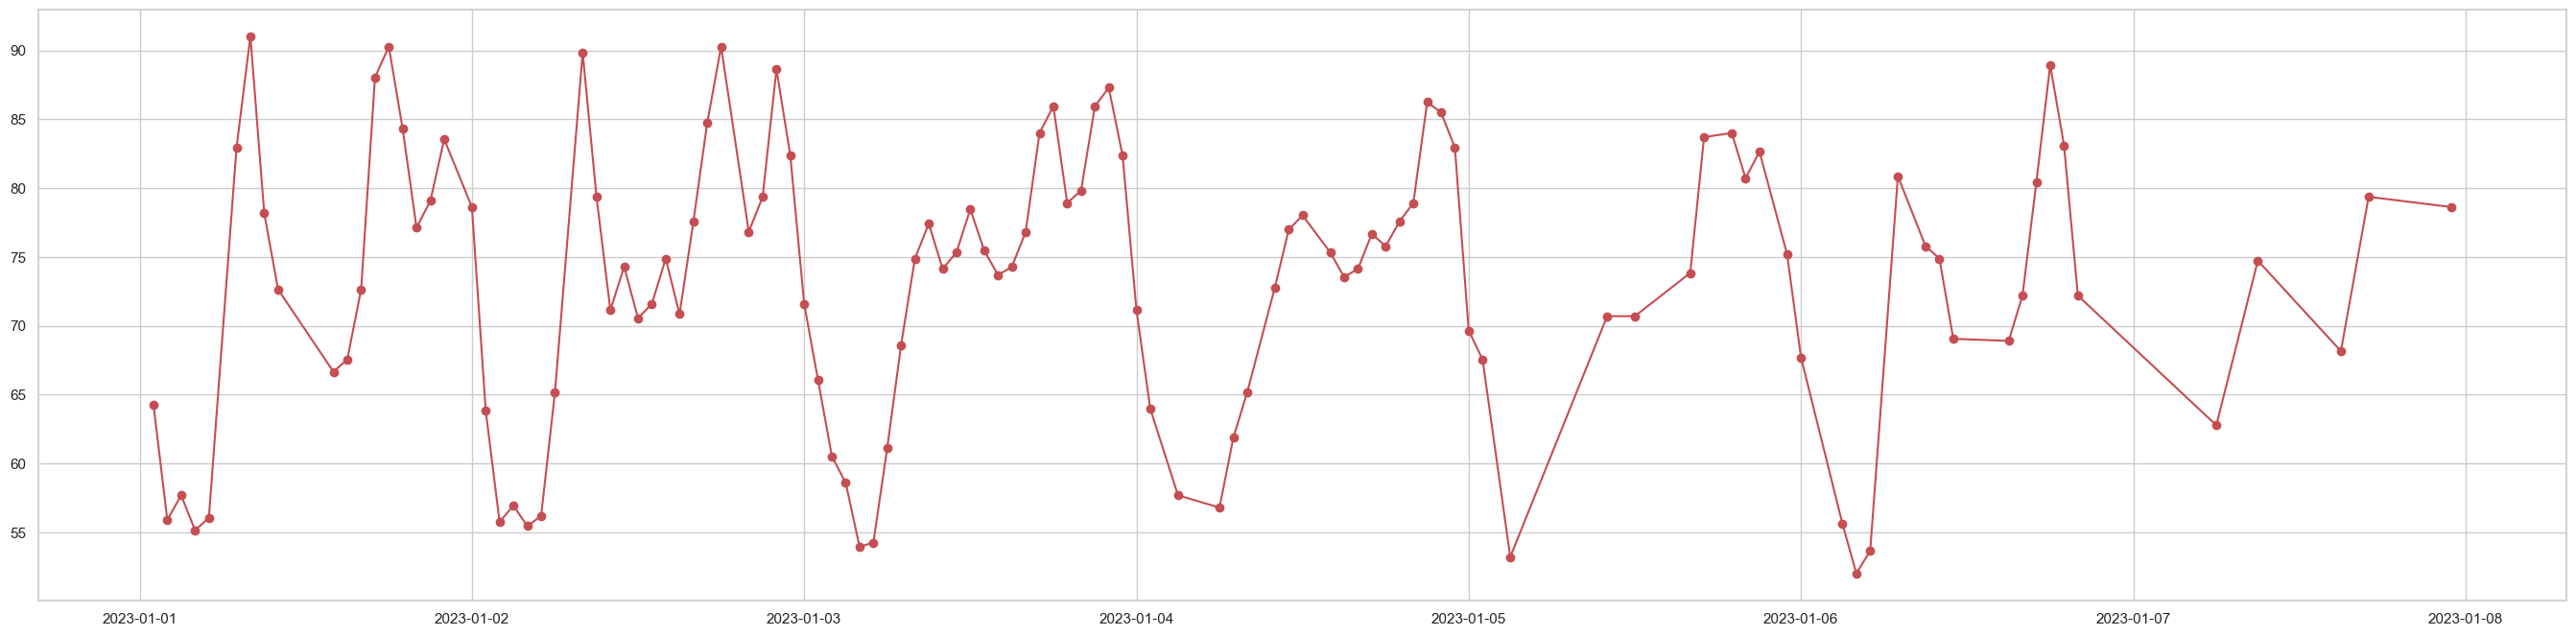

In [150]:
plt.figure(figsize=(34,8))
plt.plot(df['Energy'],marker='o', color='r')

In [151]:
df=df.drop('BS', axis=1)

In [152]:
from statsmodels.tsa.stattools import adfuller
adf, pvalue, usedlag_, nobs_, critical_values_, icbest_= adfuller(df)
print("p value= ", pvalue, ', if above 0.05, data is not stationary')

p value=  5.764683454824424e-07 , if above 0.05, data is not stationary


In [153]:
df['date'] = [d.date() for d in df.index]
df['time'] = [d.time() for d in df.index]

In [154]:
df

,Energy,date,time
Time,,,
2023-01-01 01:00:00,64.275037,2023-01-01,01:00:00
2023-01-01 02:00:00,55.904335,2023-01-01,02:00:00
2023-01-01 03:00:00,57.698057,2023-01-01,03:00:00
2023-01-01 04:00:00,55.156951,2023-01-01,04:00:00
2023-01-01 05:00:00,56.053812,2023-01-01,05:00:00
...,...,...,...
2023-01-07 06:00:00,62.780269,2023-01-07,06:00:00
2023-01-07 09:00:00,74.738416,2023-01-07,09:00:00
2023-01-07 15:00:00,68.161435,2023-01-07,15:00:00


In [155]:
def plot_energy_distribution(BS_value):
    df = energy[energy['BS'] == BS_value].copy()
    df['Time'] = pd.to_datetime(df['Time'])
    df.set_index('Time', inplace=True)
    df.drop('BS', axis=1, inplace=True)

    plt.figure(figsize=(34, 8))
    plt.plot(df['Energy'], marker='o', color='r')

    df['date'] = [d.date() for d in df.index]
    df['time'] = [d.time() for d in df.index]

    sns.set(style="whitegrid")
    plt.figure(figsize=(35, 7))

    # Create the date-based boxplot
    df_sorted_date = df.sort_values(by='date')
    sns.boxplot(x='date', y='Energy', data=df_sorted_date)

    plt.xlabel('Date')
    plt.ylabel('Energy Consumption')
    plt.title(f'Energy Consumption Distribution by Date for {BS_value}')
    plt.xticks(rotation=45)
    plt.show()

    plt.figure(figsize=(35, 7))

    # Create the time-based boxplot
    df_sorted_time = df.sort_values(by='time')
    sns.boxplot(x='time', y='Energy', data=df_sorted_time)

    plt.xlabel('Time')
    plt.ylabel('Energy Consumption')
    plt.title(f'Energy Consumption Distribution by Time for {BS_value}')
    plt.xticks(rotation=45)
    plt.show()


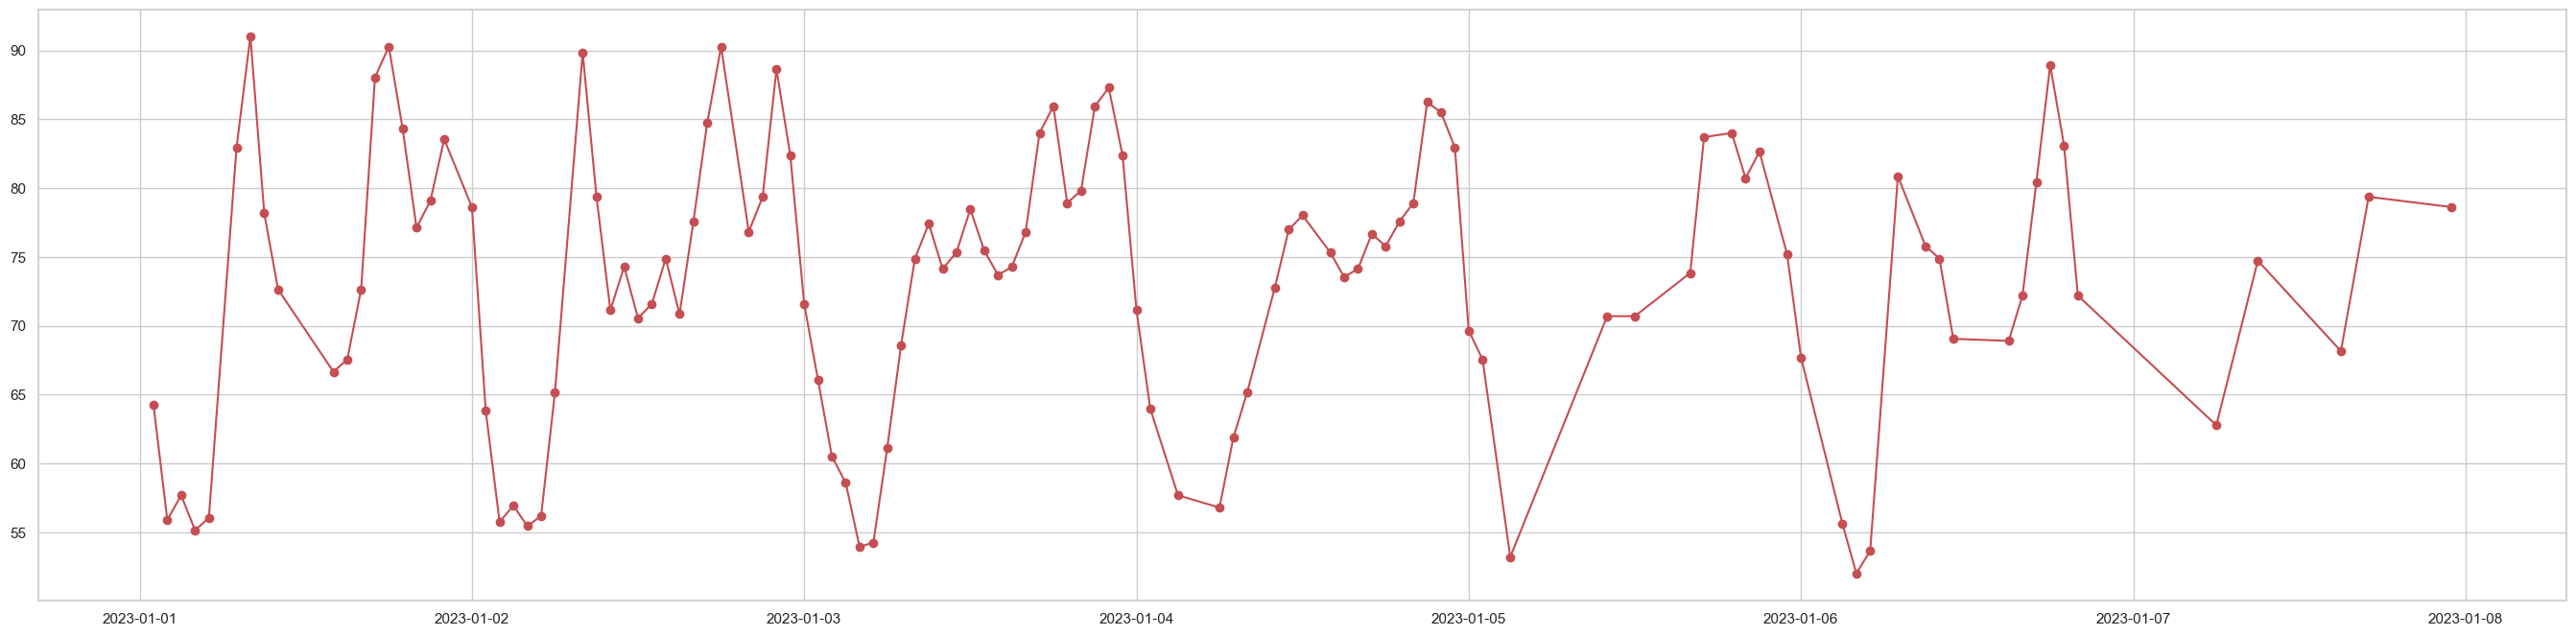

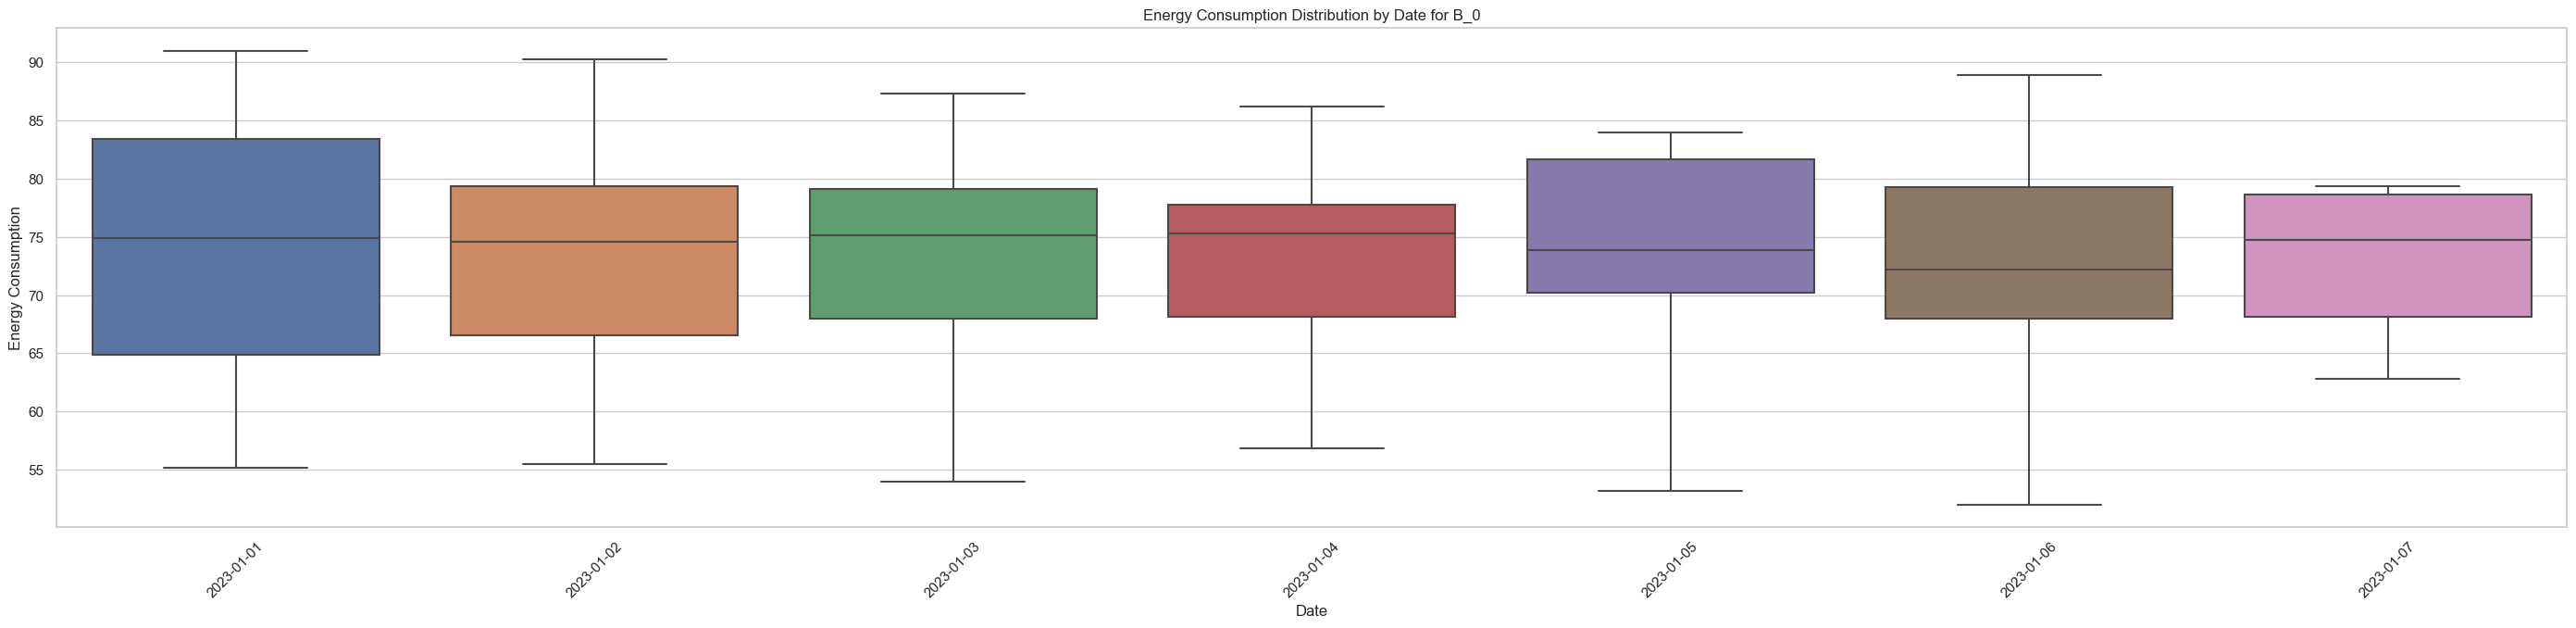

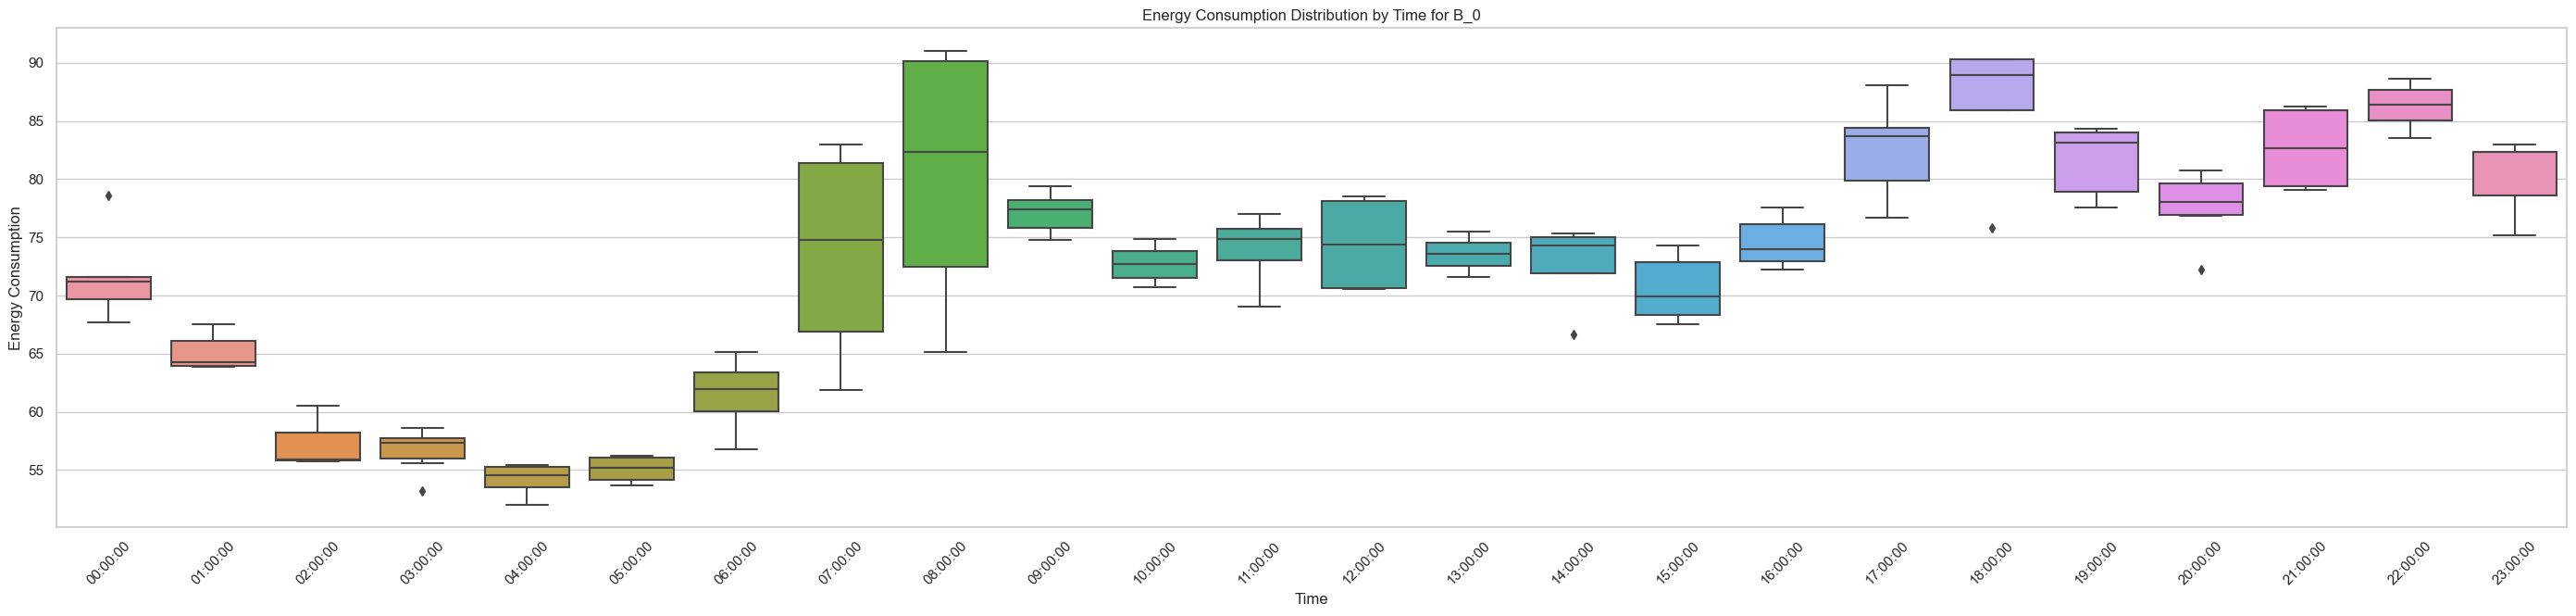

In [156]:
plot_energy_distribution('B_0')

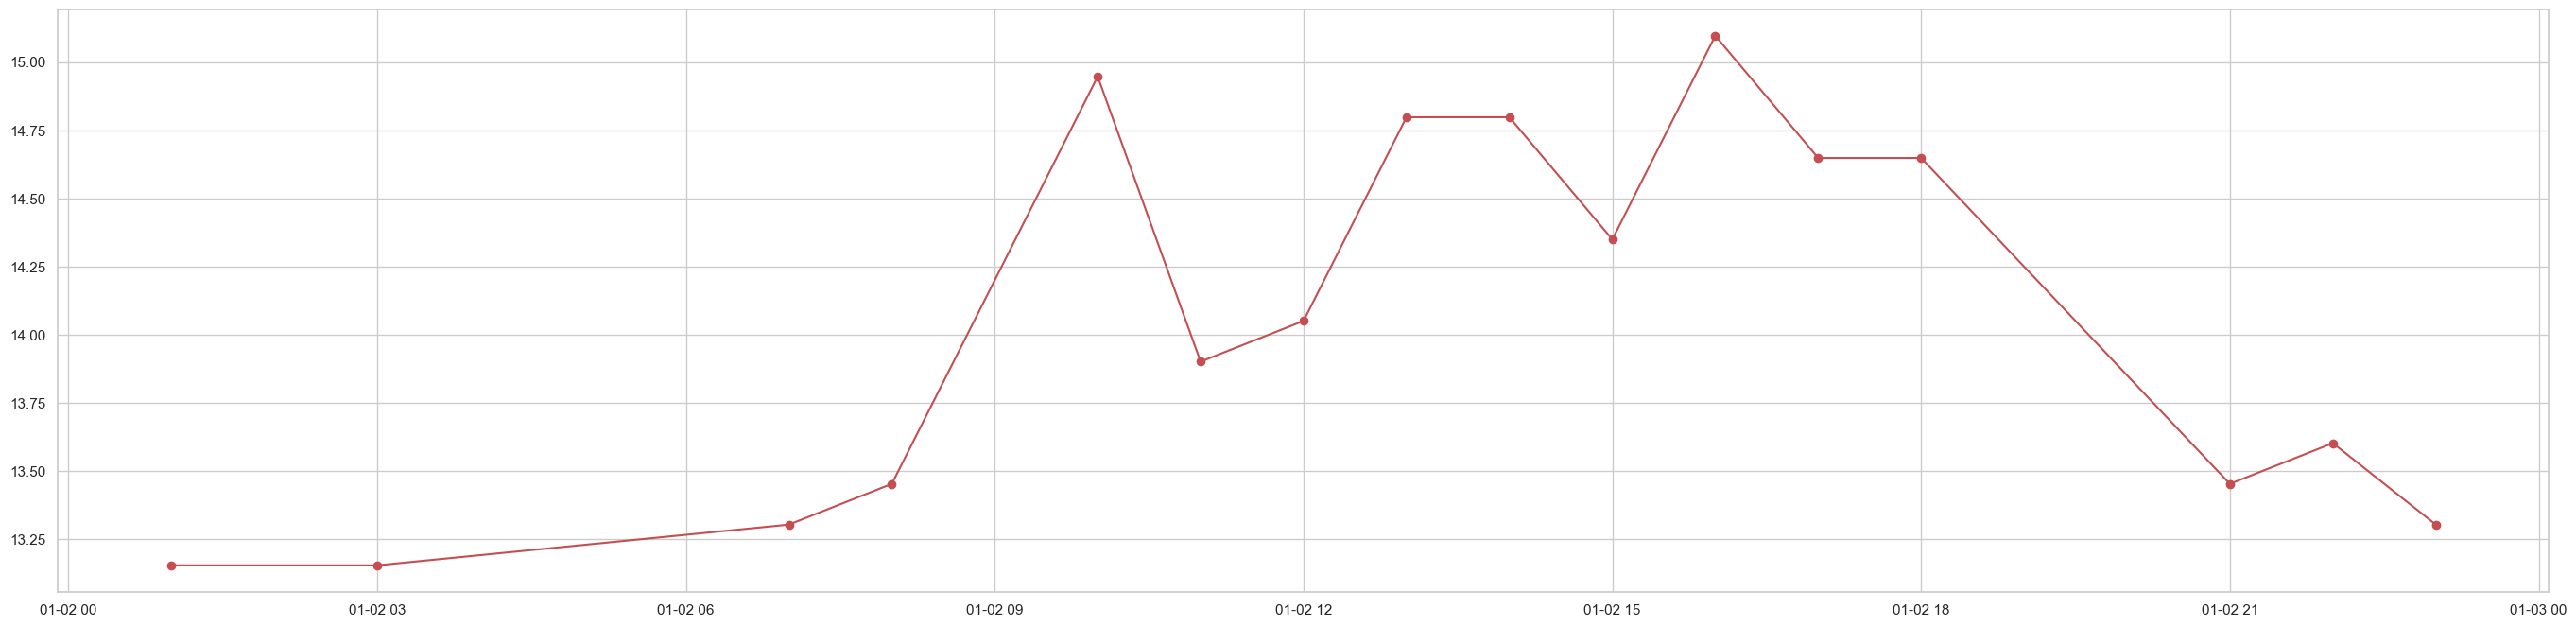

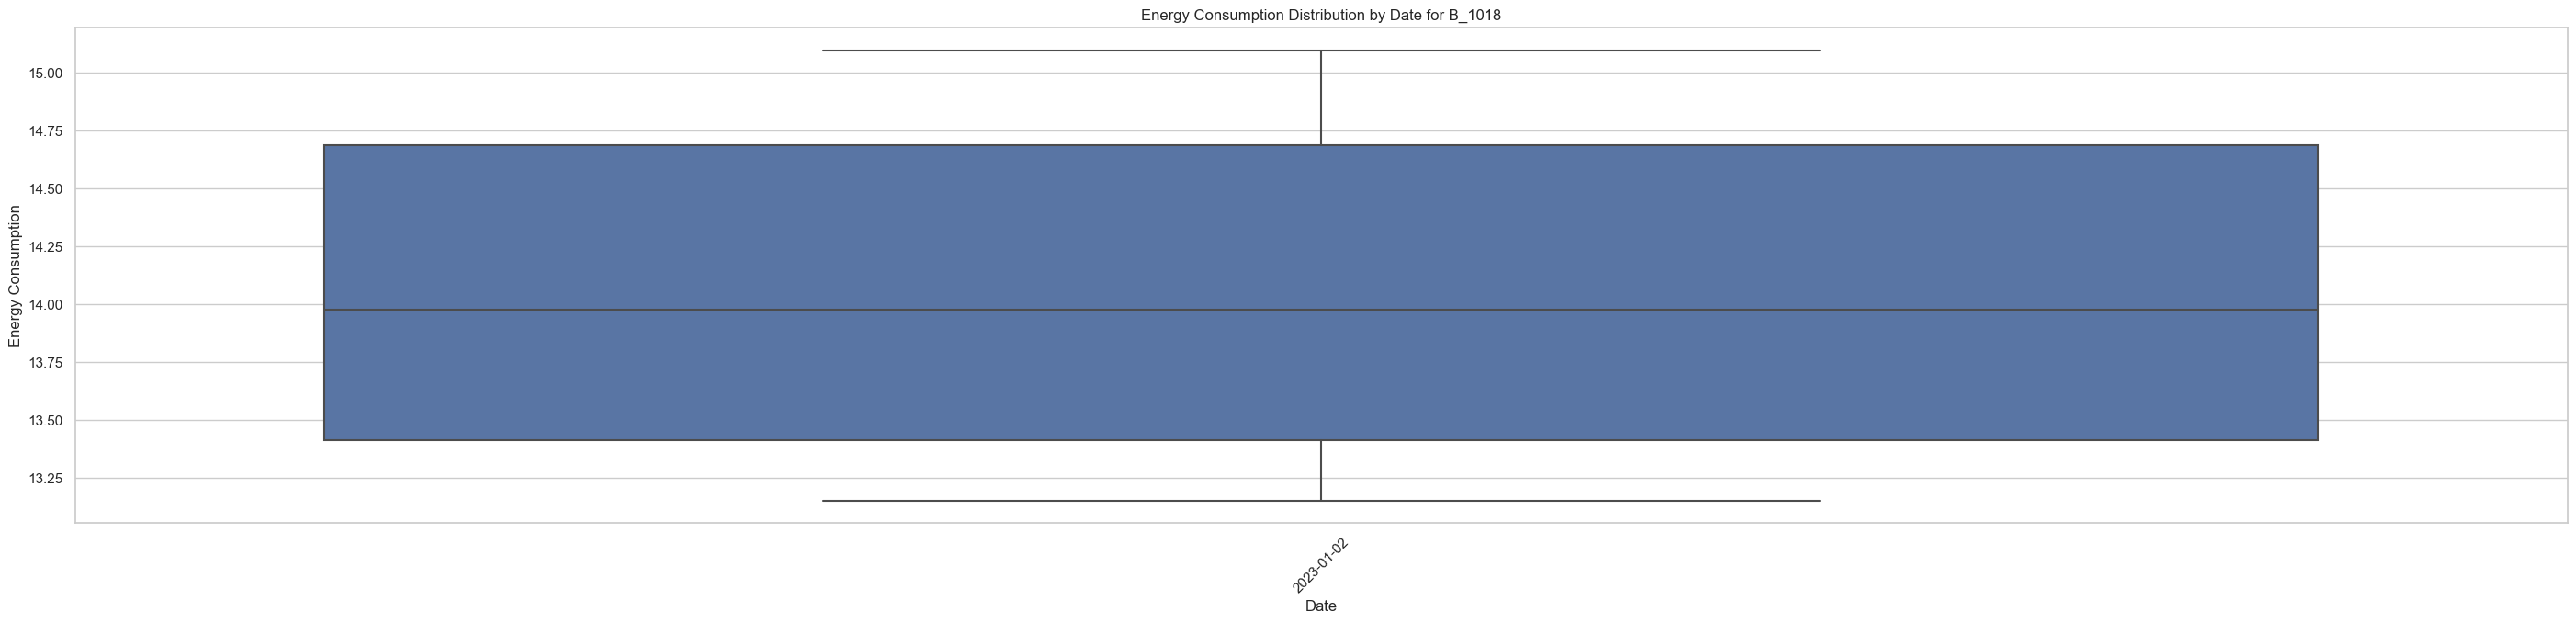

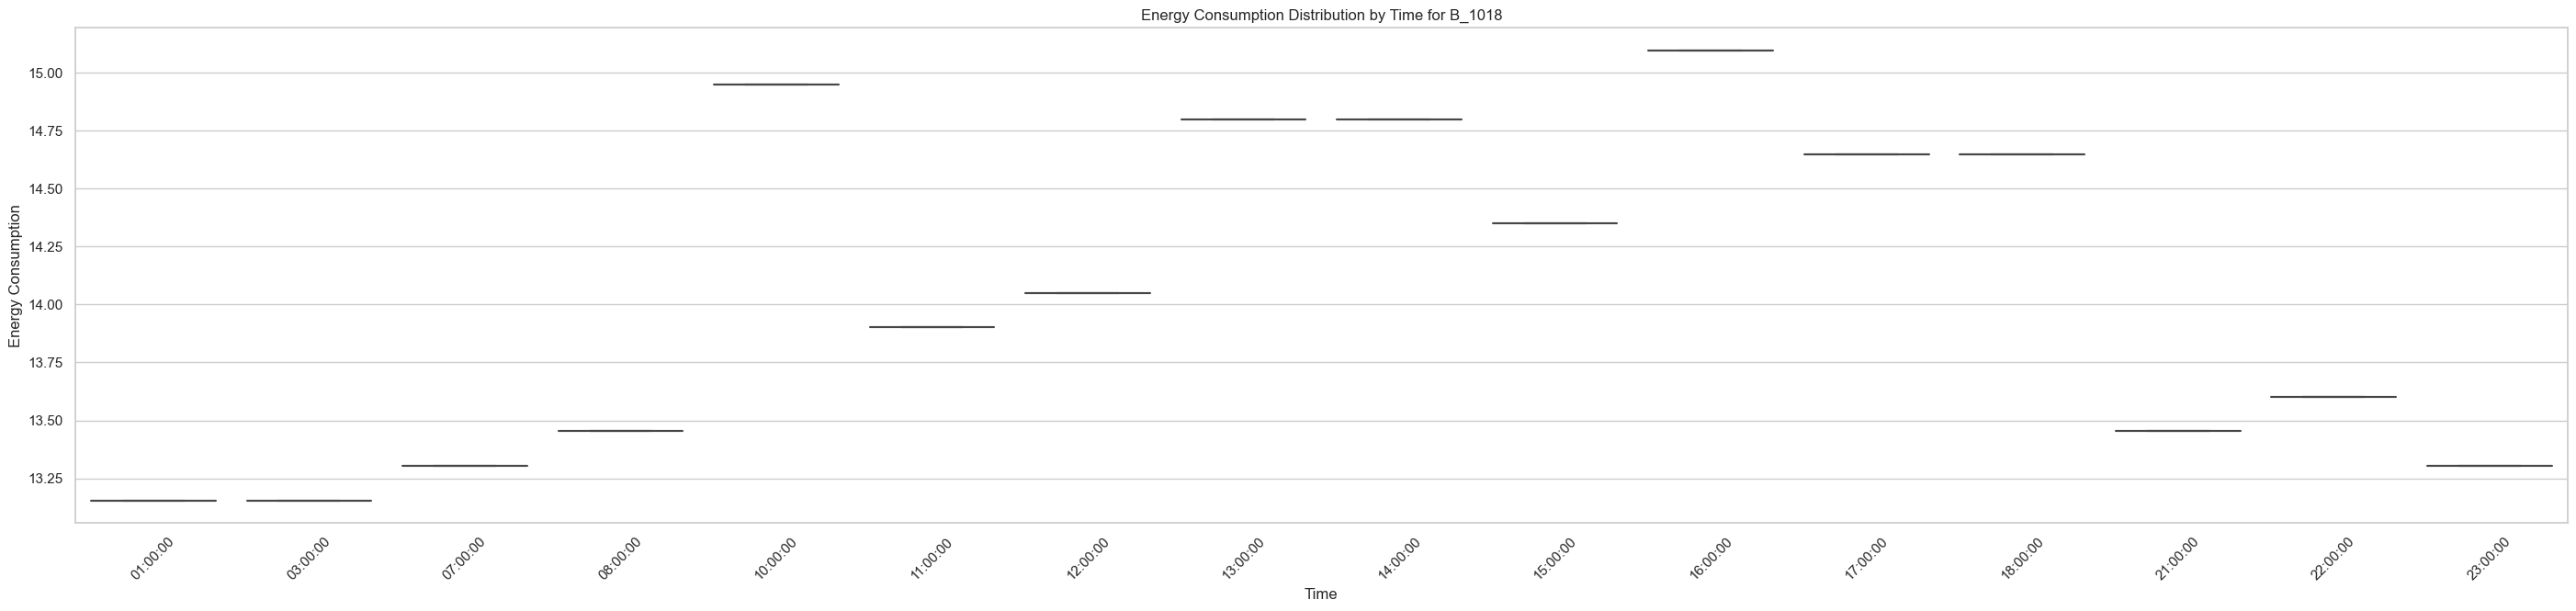

In [157]:
plot_energy_distribution('B_1018')

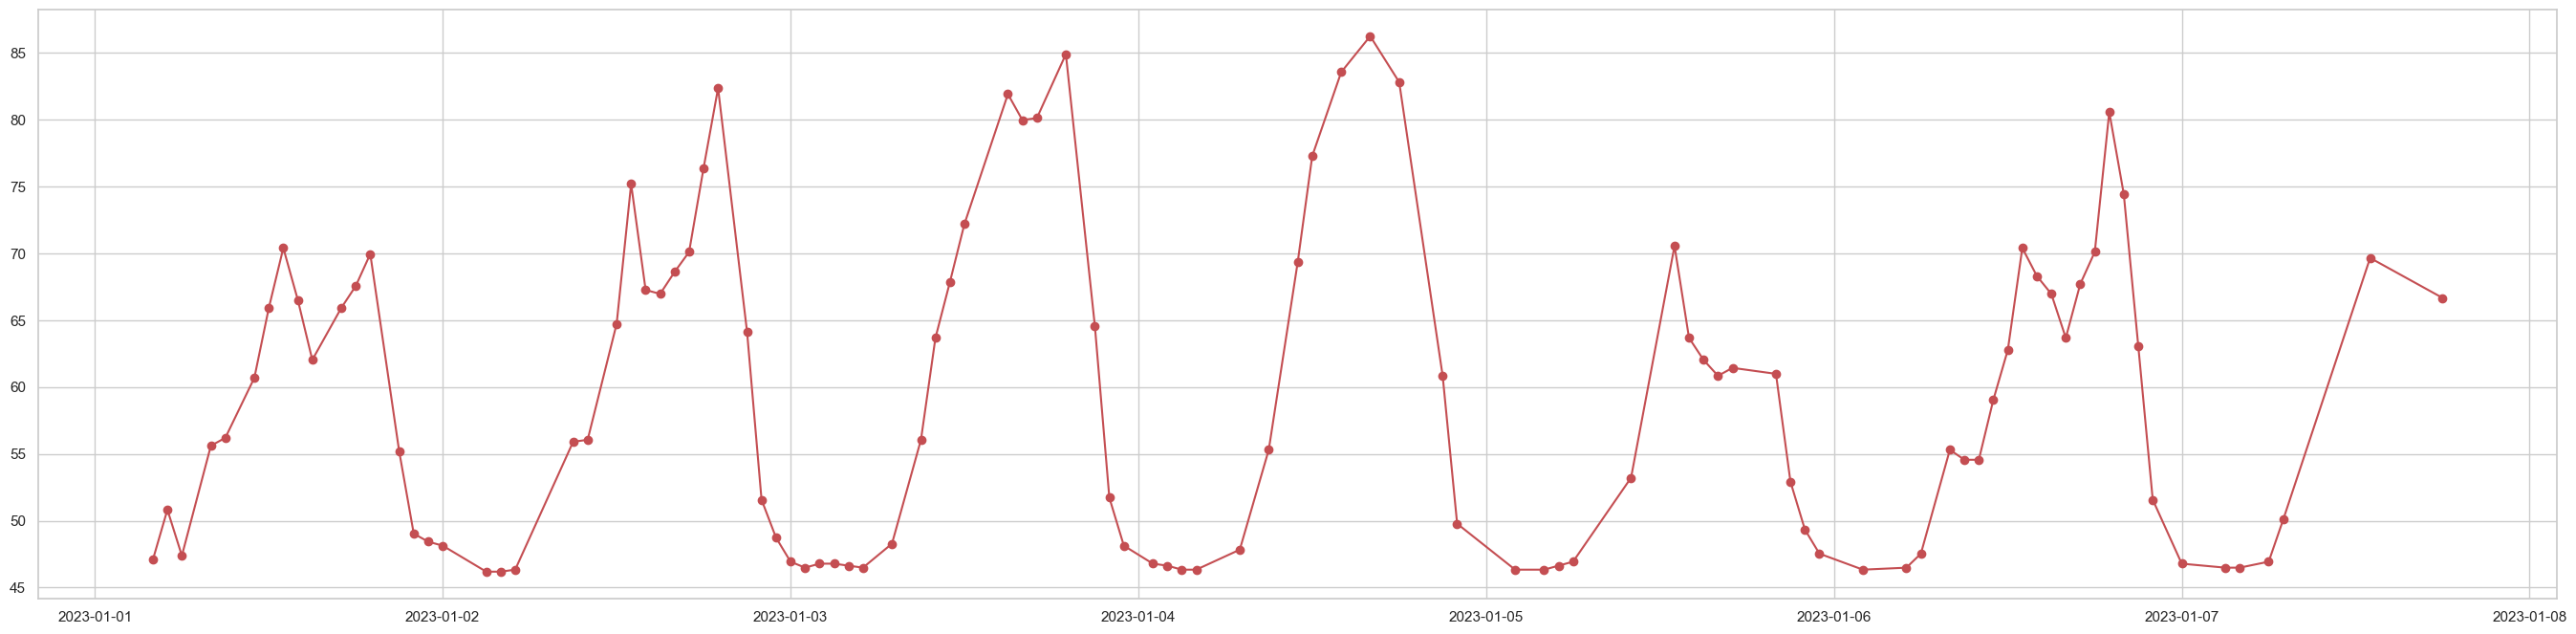

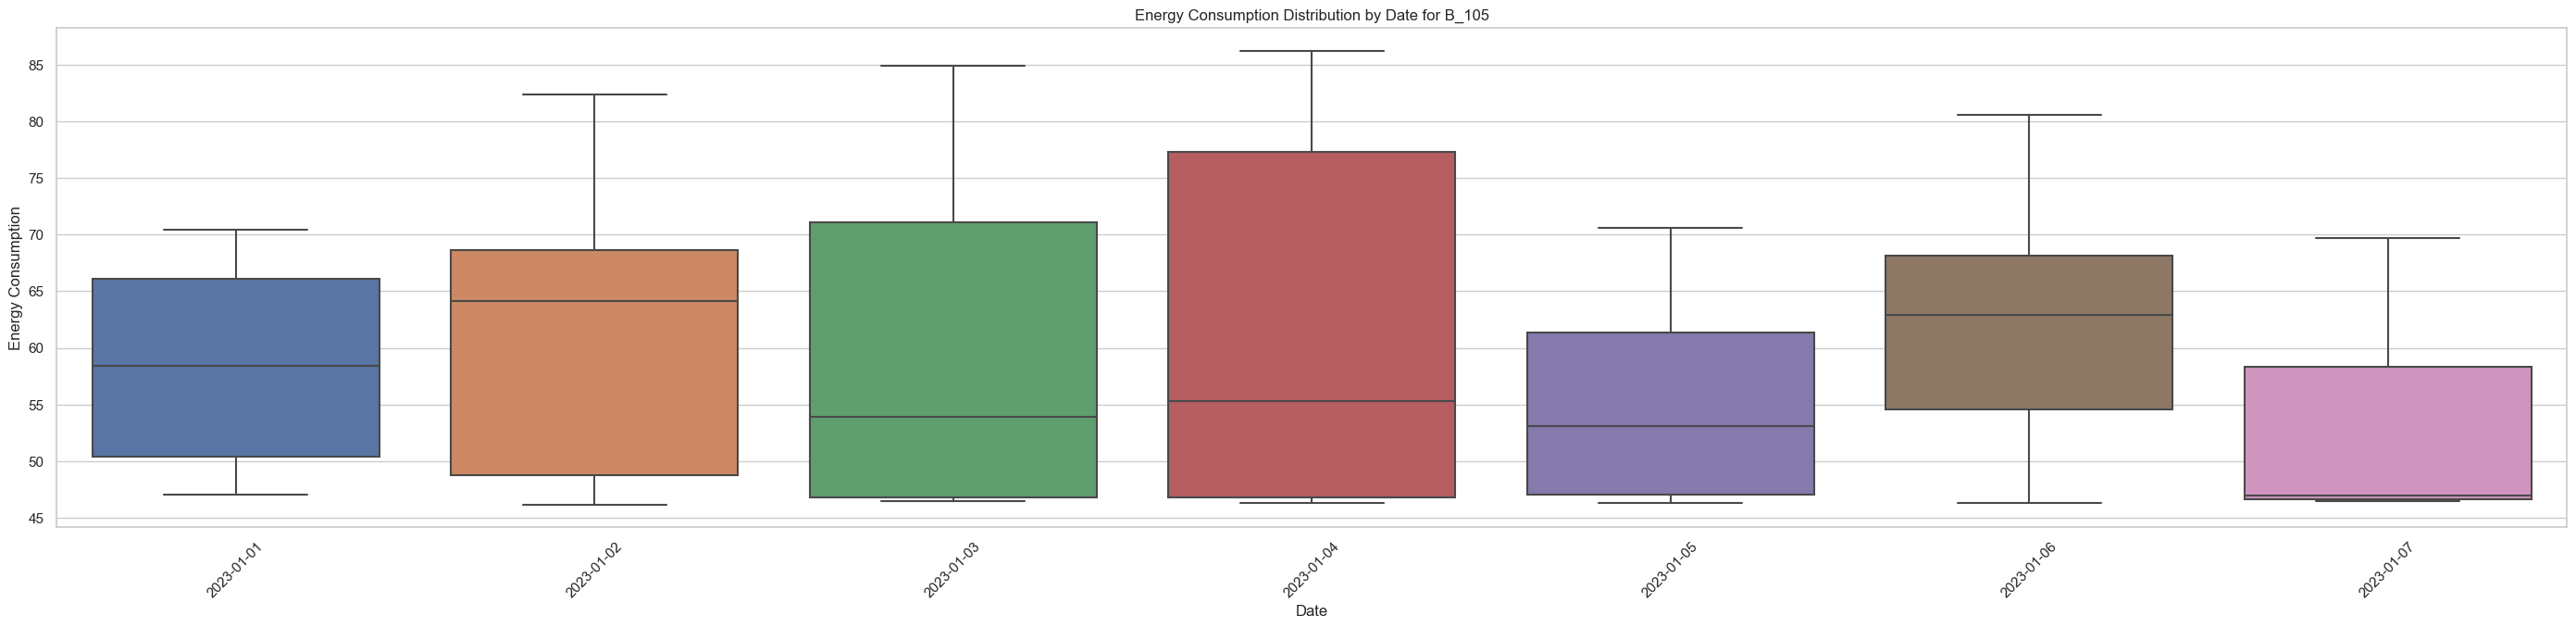

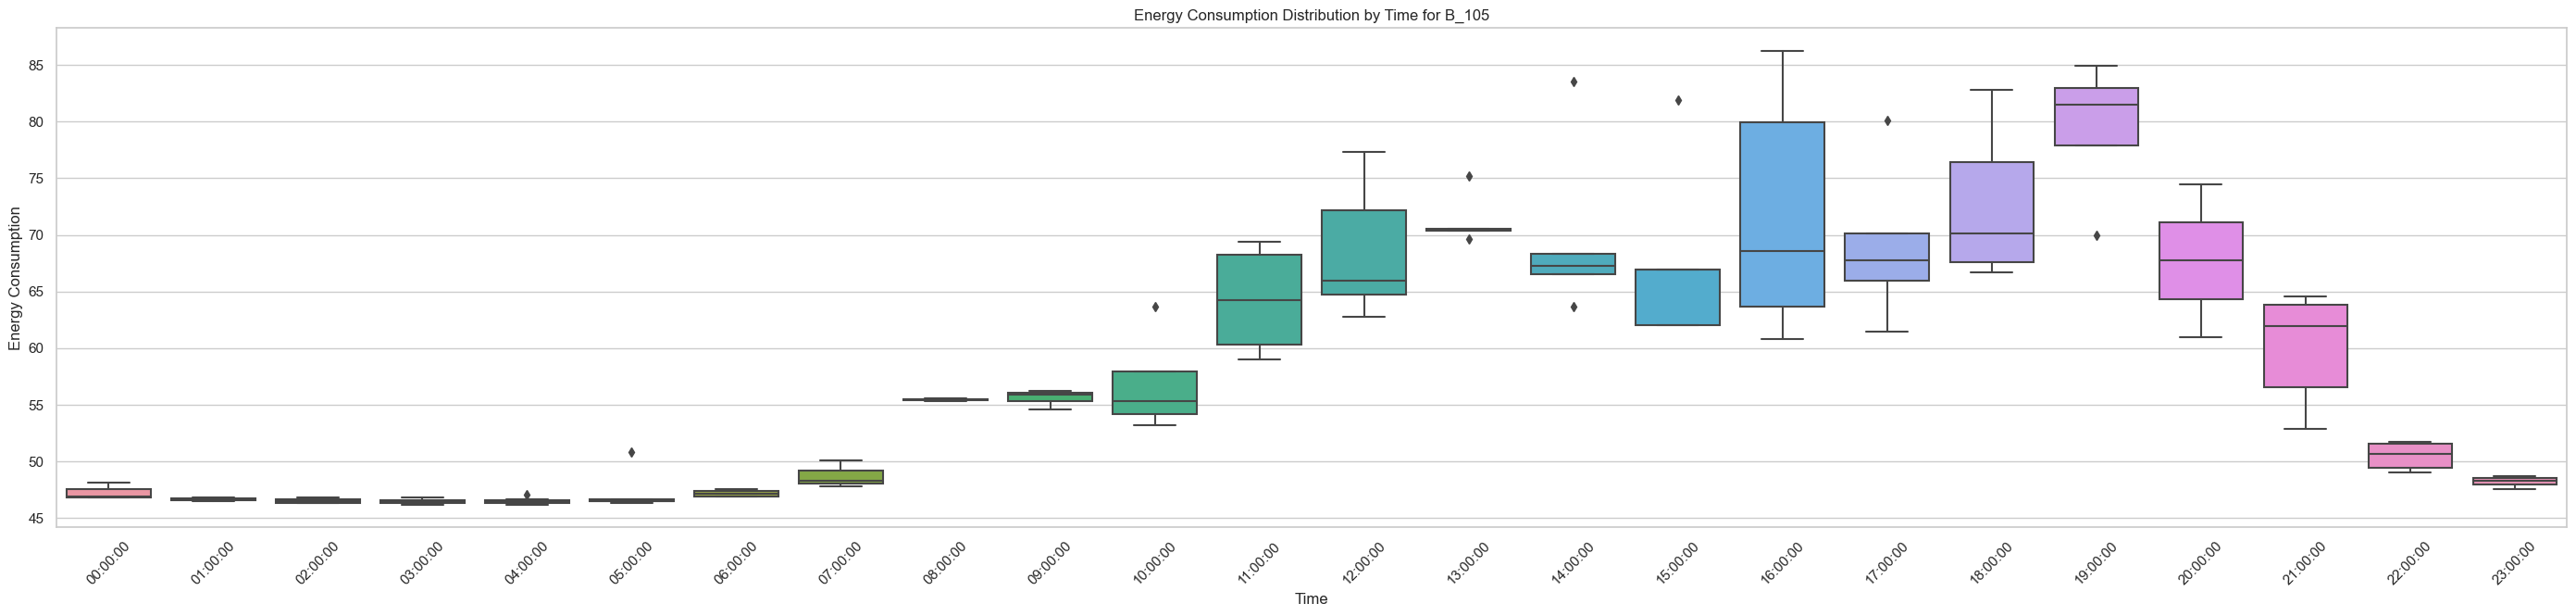

In [158]:
plot_energy_distribution('B_105')

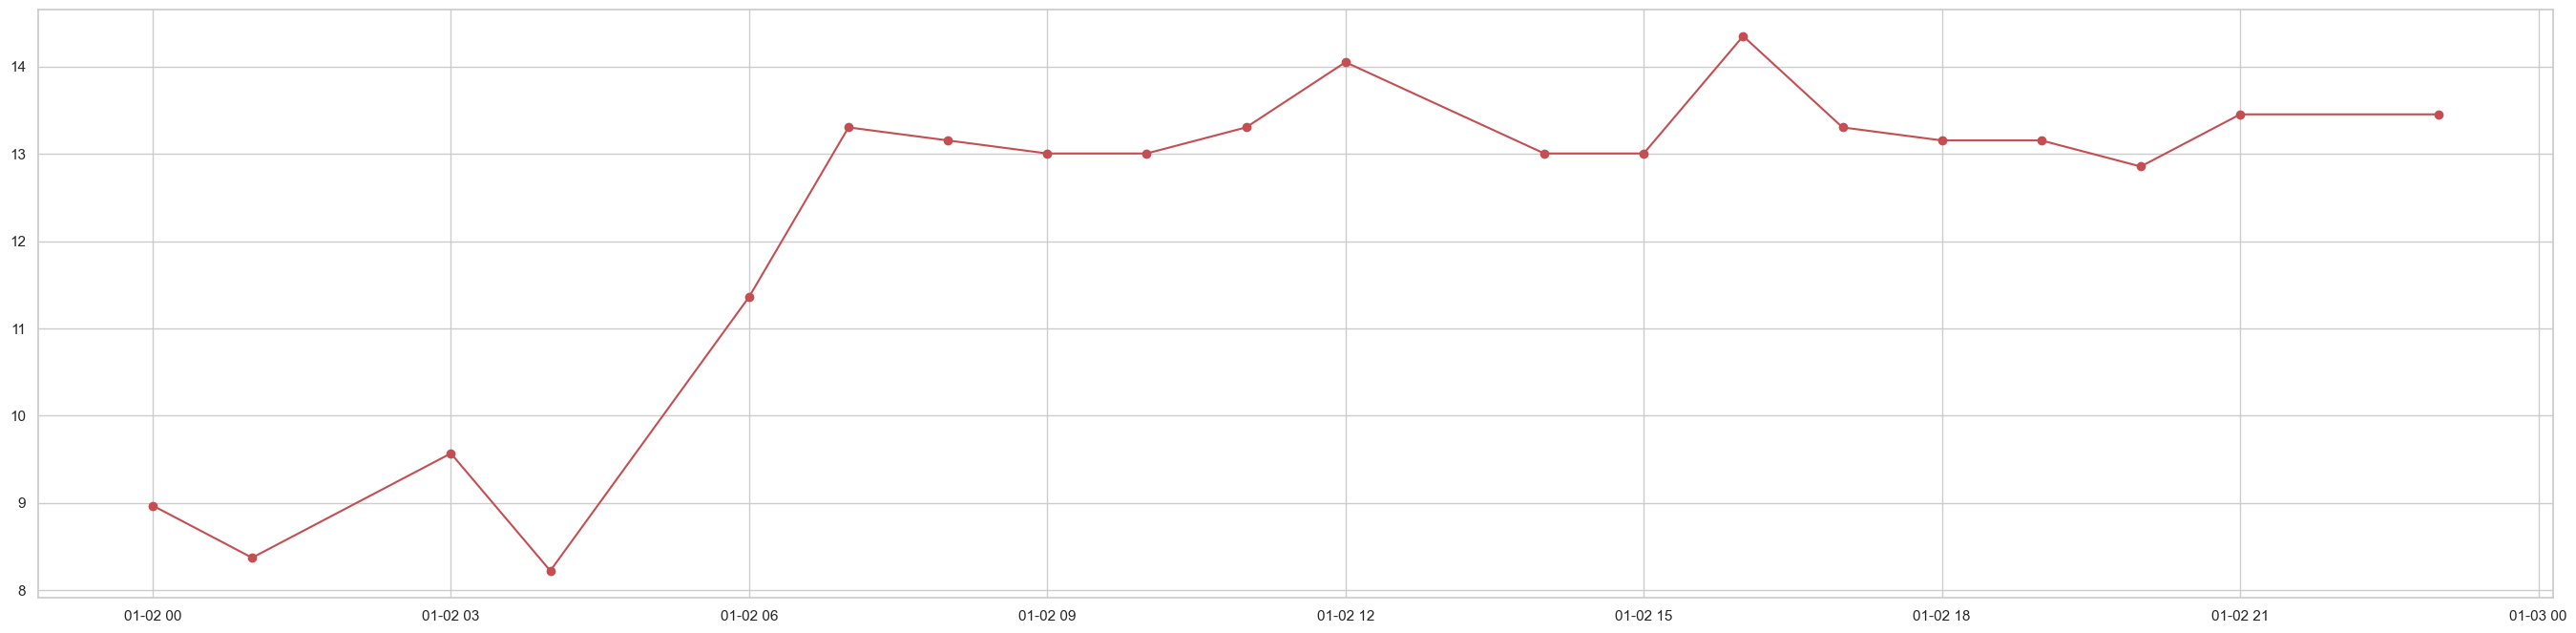

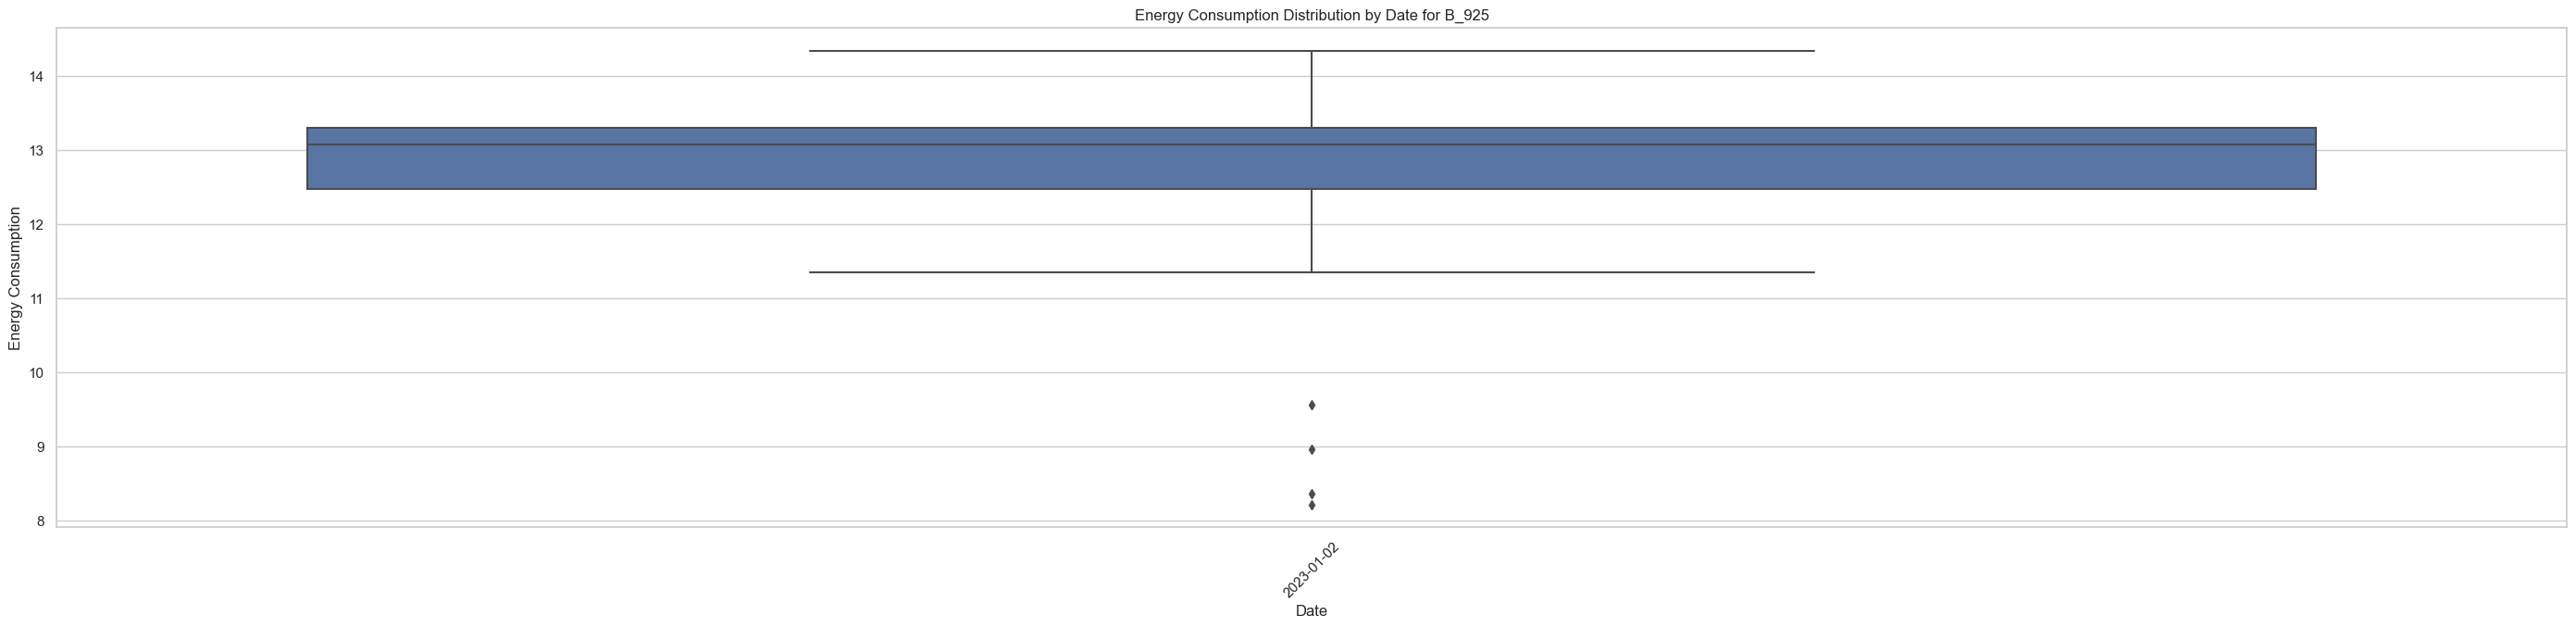

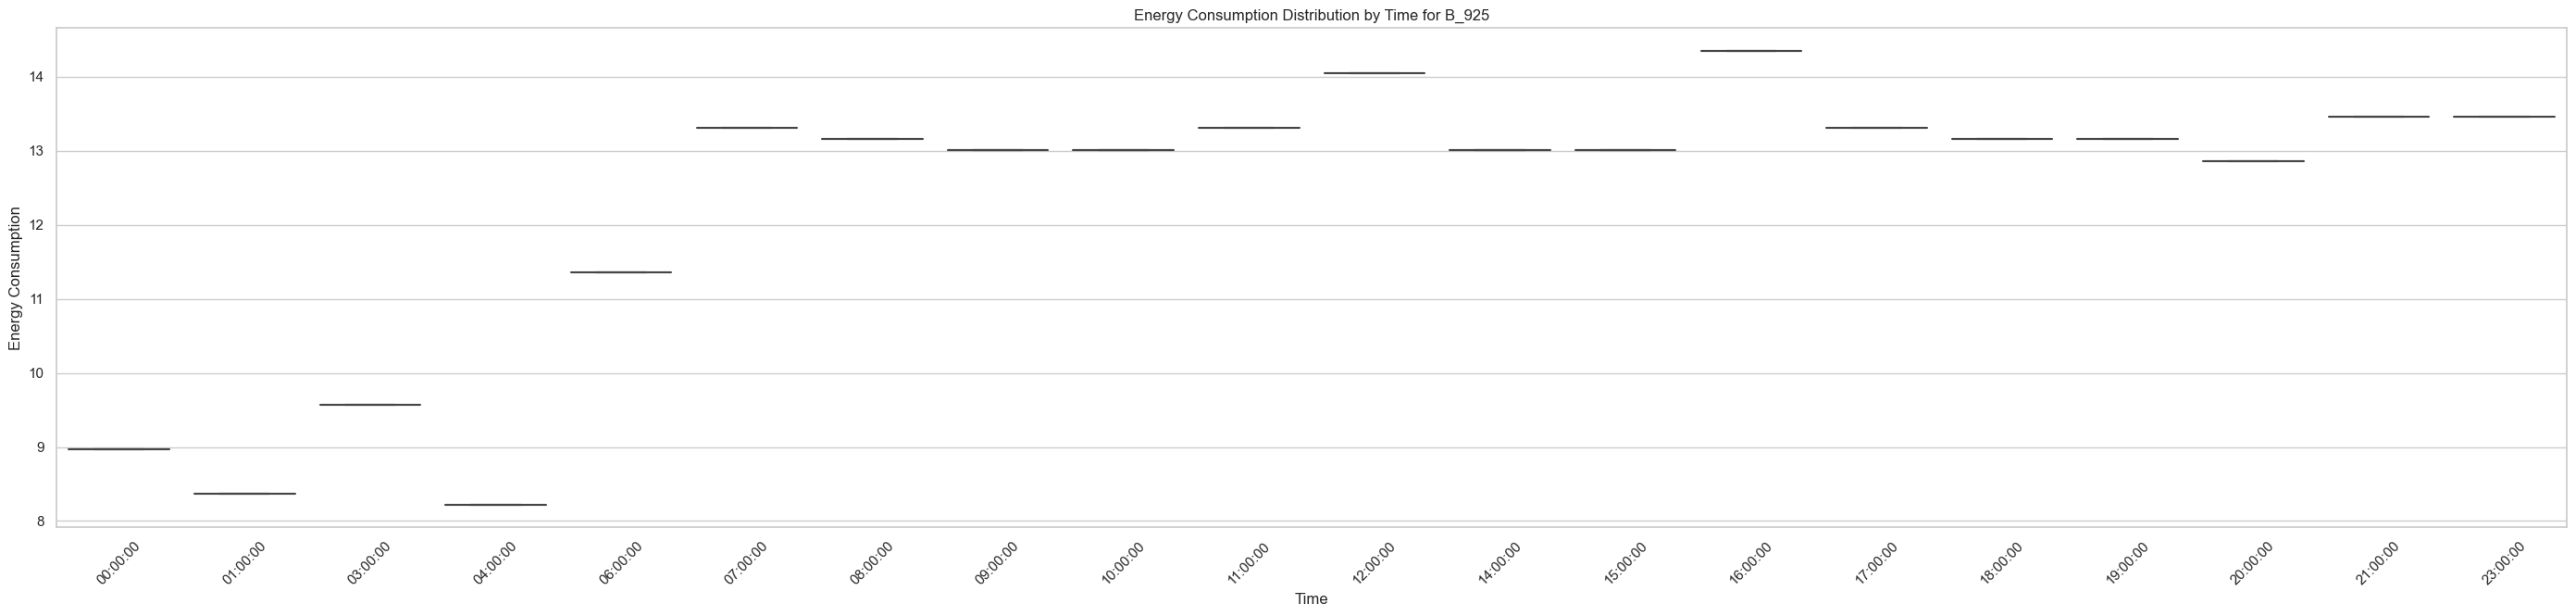

In [159]:
plot_energy_distribution('B_925')

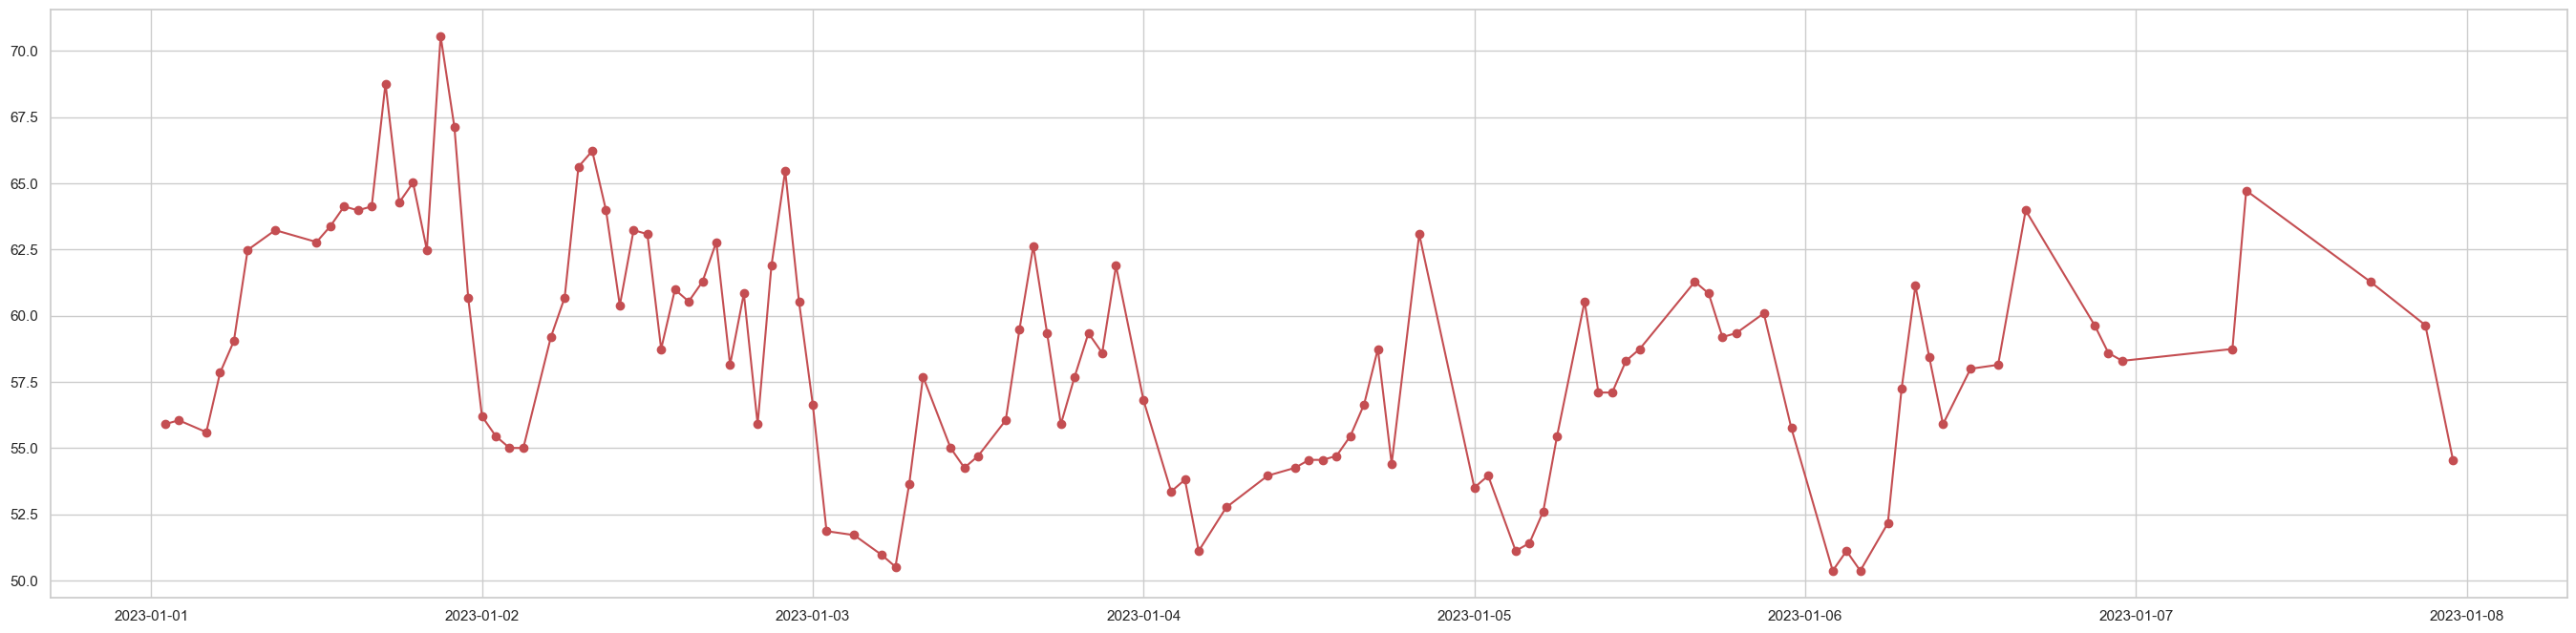

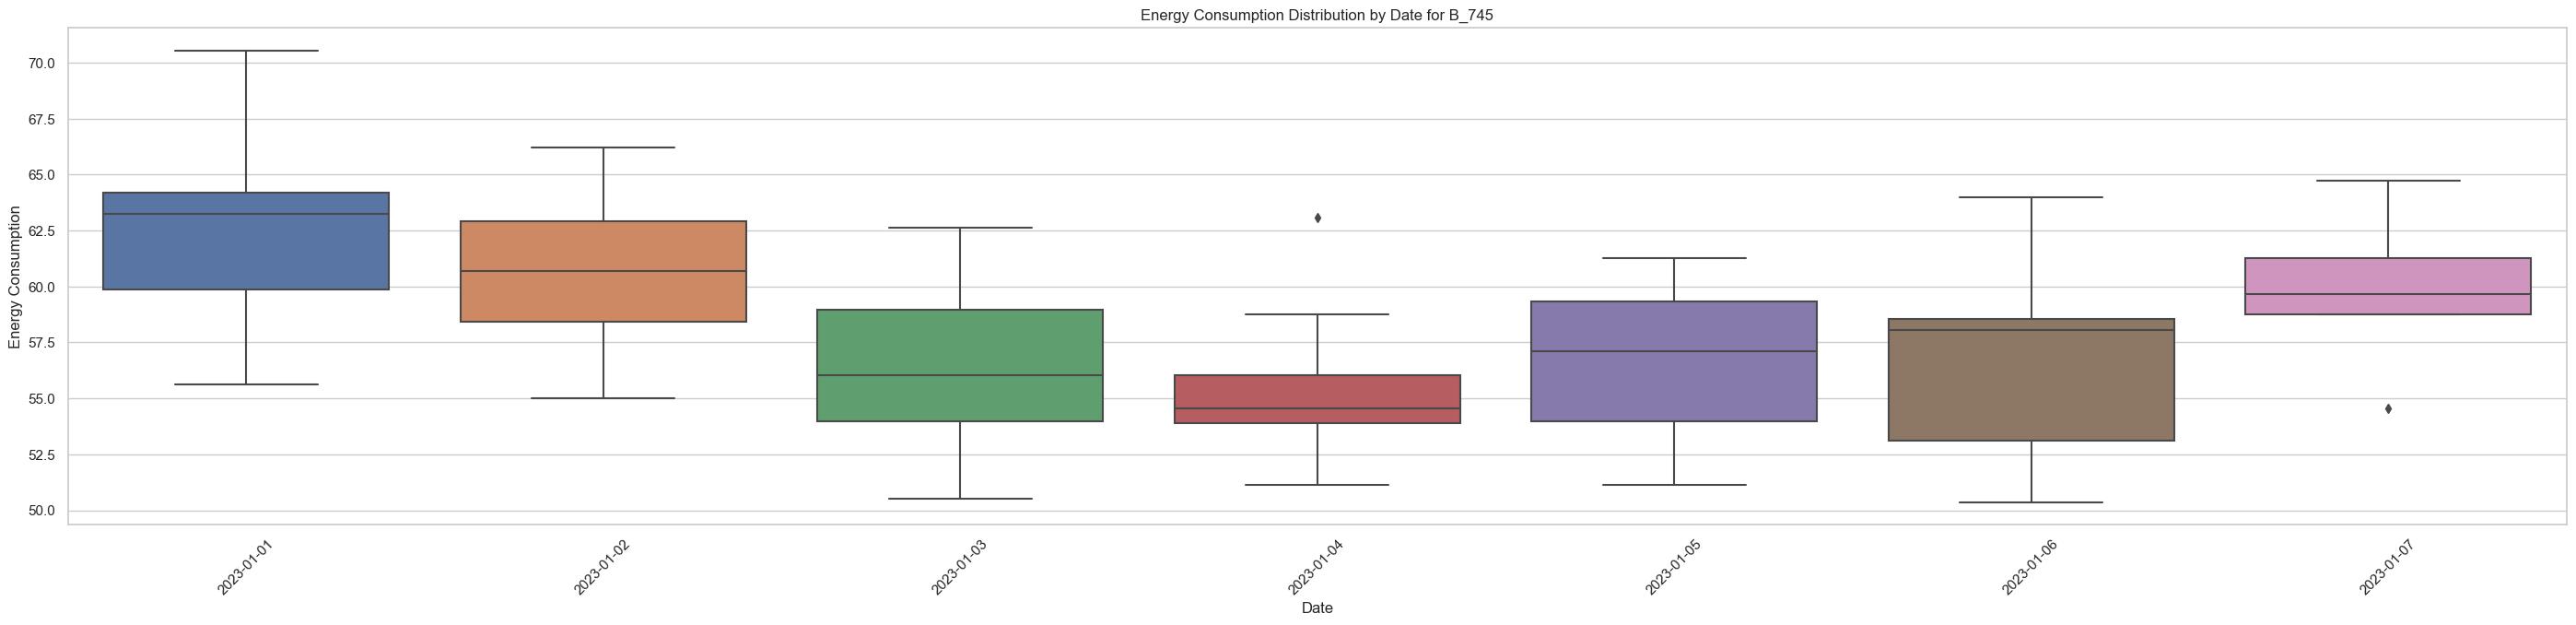

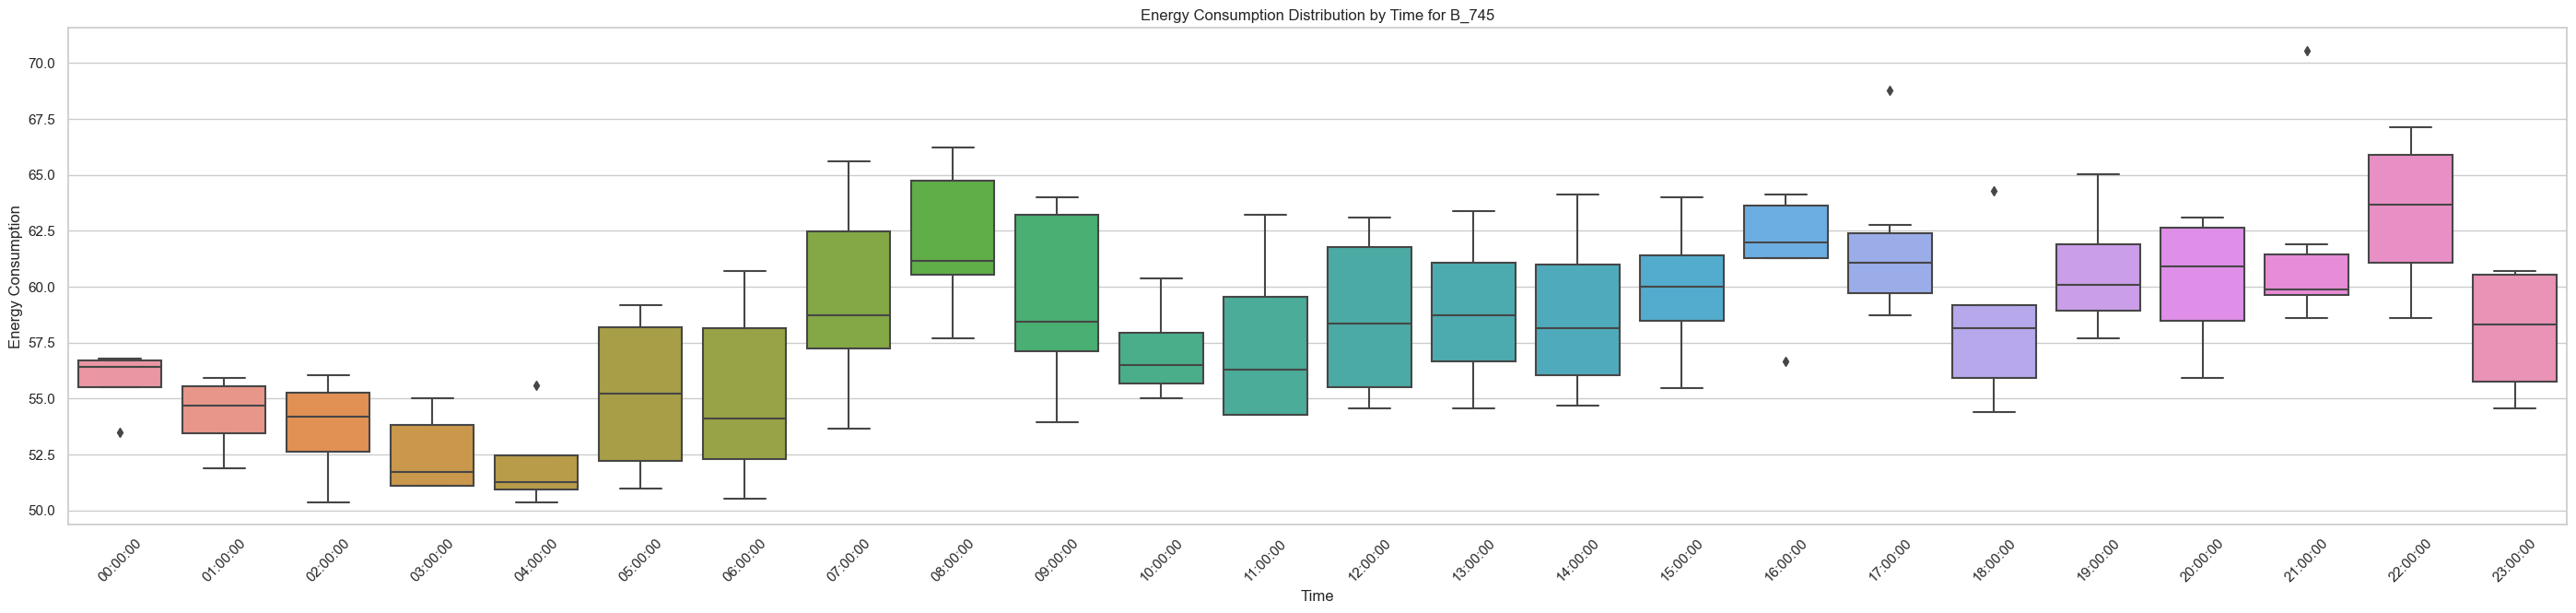

In [160]:
plot_energy_distribution('B_745')

In [161]:
def get_energy(BS, time):
    # Filter the energy DataFrame for the given BS
    df_filtered = energy[energy['BS'] == BS].copy()  # Make a copy to avoid the warning
    
    # Convert Time column to datetime
    df_filtered['Time'] = pd.to_datetime(df_filtered['Time'])
    
    # Filter the DataFrame for the given time
    df_time_filtered = df_filtered[df_filtered['Time'].dt.time == time]
    
    # Calculate the mean energy for the given time
    if df_time_filtered.empty:
        # If no matching time entry, calculate the average energy for the BS
        mean_energy = df_filtered['Energy'].mean()
    else:
        mean_energy = df_time_filtered['Energy'].median()
    
    return mean_energy


In [138]:
submit=pd.read_csv("PCprediction.csv")

# Assuming submit is your DataFrame
submit['Time'] = pd.to_datetime(submit['Time'])
submit['time'] = [d.time() for d in submit['Time']]

# Loop through the rows of the DataFrame
for index, row in submit.iterrows():
    BS_value = row['BS']
    time_value = row['time']
    
    # If BS_value is not present in the energy DataFrame, use 'B_0'
    if BS_value not in energy['BS'].unique():
        BS_value = 'B_0'
    
    # Call the get_energy function with BS and time values
    energy_result = get_energy(BS_value, time_value)
    
    # Update the Energy column in the DataFrame using .loc
    submit.loc[index, 'Energy'] = energy_result

# Print the updated DataFrame
print(submit)


                     Time      BS     Energy  w      time
0     2023-01-01 06:00:00     B_0  61.958146  1  06:00:00
1     2023-01-01 11:00:00     B_0  74.813154  1  11:00:00
2     2023-01-01 12:00:00     B_0  74.364723  1  12:00:00
3     2023-01-01 13:00:00     B_0  73.542601  1  13:00:00
4     2023-01-01 23:00:00     B_0  82.361734  1  23:00:00
...                   ...     ...        ... ..       ...
26134 2023-01-02 19:00:00  B_1019  83.109118  5  19:00:00
26135 2023-01-02 20:00:00  B_1019  78.026906  5  20:00:00
26136 2023-01-02 21:00:00  B_1019  82.660688  5  21:00:00
26137 2023-01-02 22:00:00  B_1019  86.397608  5  22:00:00
26138 2023-01-02 23:00:00  B_1019  82.361734  5  23:00:00

[26139 rows x 5 columns]


In [162]:
submit

,Time,BS,Energy,w
0,1/1/2023 6:00,B_0,NaN,1
1,1/1/2023 11:00,B_0,NaN,1
2,1/1/2023 12:00,B_0,NaN,1
3,1/1/2023 13:00,B_0,NaN,1
4,1/1/2023 23:00,B_0,NaN,1
...,...,...,...,...
26134,1/2/2023 19:00,B_1019,NaN,5
26135,1/2/2023 20:00,B_1019,NaN,5
26136,1/2/2023 21:00,B_1019,NaN,5
26137,1/2/2023 22:00,B_1019,NaN,5


submit['ID'] = submit['Time'].astype(str) + '_' + submit['BS']

In [164]:
submit=submit[['ID','Energy']]

In [165]:
submit

,ID,Energy
0,1/1/2023 6:00_B_0,NaN
1,1/1/2023 11:00_B_0,NaN
2,1/1/2023 12:00_B_0,NaN
3,1/1/2023 13:00_B_0,NaN
4,1/1/2023 23:00_B_0,NaN
...,...,...
26134,1/2/2023 19:00_B_1019,NaN
26135,1/2/2023 20:00_B_1019,NaN
26136,1/2/2023 21:00_B_1019,NaN
26137,1/2/2023 22:00_B_1019,NaN


In [143]:
submit.to_csv('SampleSubmission__27_.csv', index=False)

--------------------------------------------------------------------------------------------------------------------------------------------------

In [213]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
plt.style.use('dark_background')

In [214]:
base=pd.read_csv('BSinfo.csv')
cell=pd.read_csv('CLdata.csv')
energy=pd.read_csv('ECdata.csv')
submit=pd.read_csv("PCprediction.csv")

In [215]:
energy['Time'] = pd.to_datetime(energy['Time'])
energy

,Time,BS,Energy
0,2023-01-01 01:00:00,B_0,64.275037
1,2023-01-01 02:00:00,B_0,55.904335
2,2023-01-01 03:00:00,B_0,57.698057
3,2023-01-01 04:00:00,B_0,55.156951
4,2023-01-01 05:00:00,B_0,56.053812
...,...,...,...
92624,2023-01-02 17:00:00,B_1018,14.648729
92625,2023-01-02 18:00:00,B_1018,14.648729
92626,2023-01-02 21:00:00,B_1018,13.452915
92627,2023-01-02 22:00:00,B_1018,13.602392


In [216]:
df=energy[energy['BS']=='B_0']

In [217]:
df.set_index('Time',inplace=True)

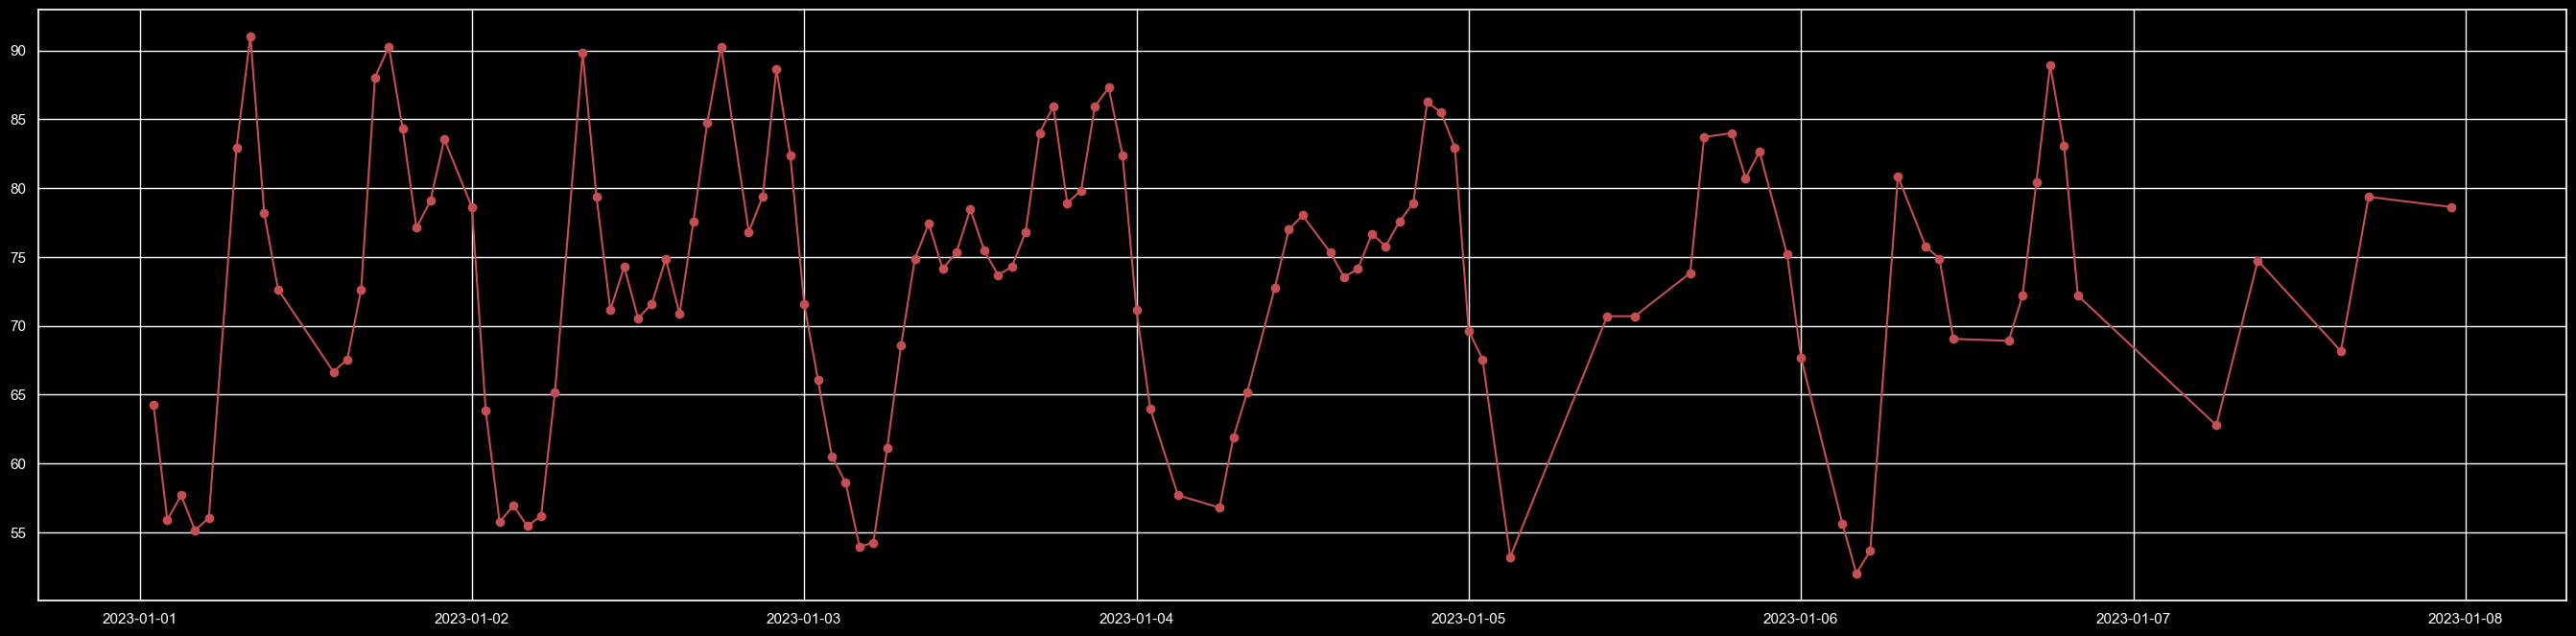

In [218]:
plt.figure(figsize=(34,8))
plt.plot(df['Energy'],marker='o', color='r')

In [219]:
df=df.drop('BS', axis=1)

In [220]:
from statsmodels.tsa.stattools import adfuller
adf, pvalue, usedlag_, nobs_, critical_values_, icbest_= adfuller(df)
print("p value= ", pvalue, ', if above 0.05, data is not stationary')

p value=  5.764683454824424e-07 , if above 0.05, data is not stationary


In [221]:
df['date'] = [d.date() for d in df.index]
df['time'] = [d.time() for d in df.index]

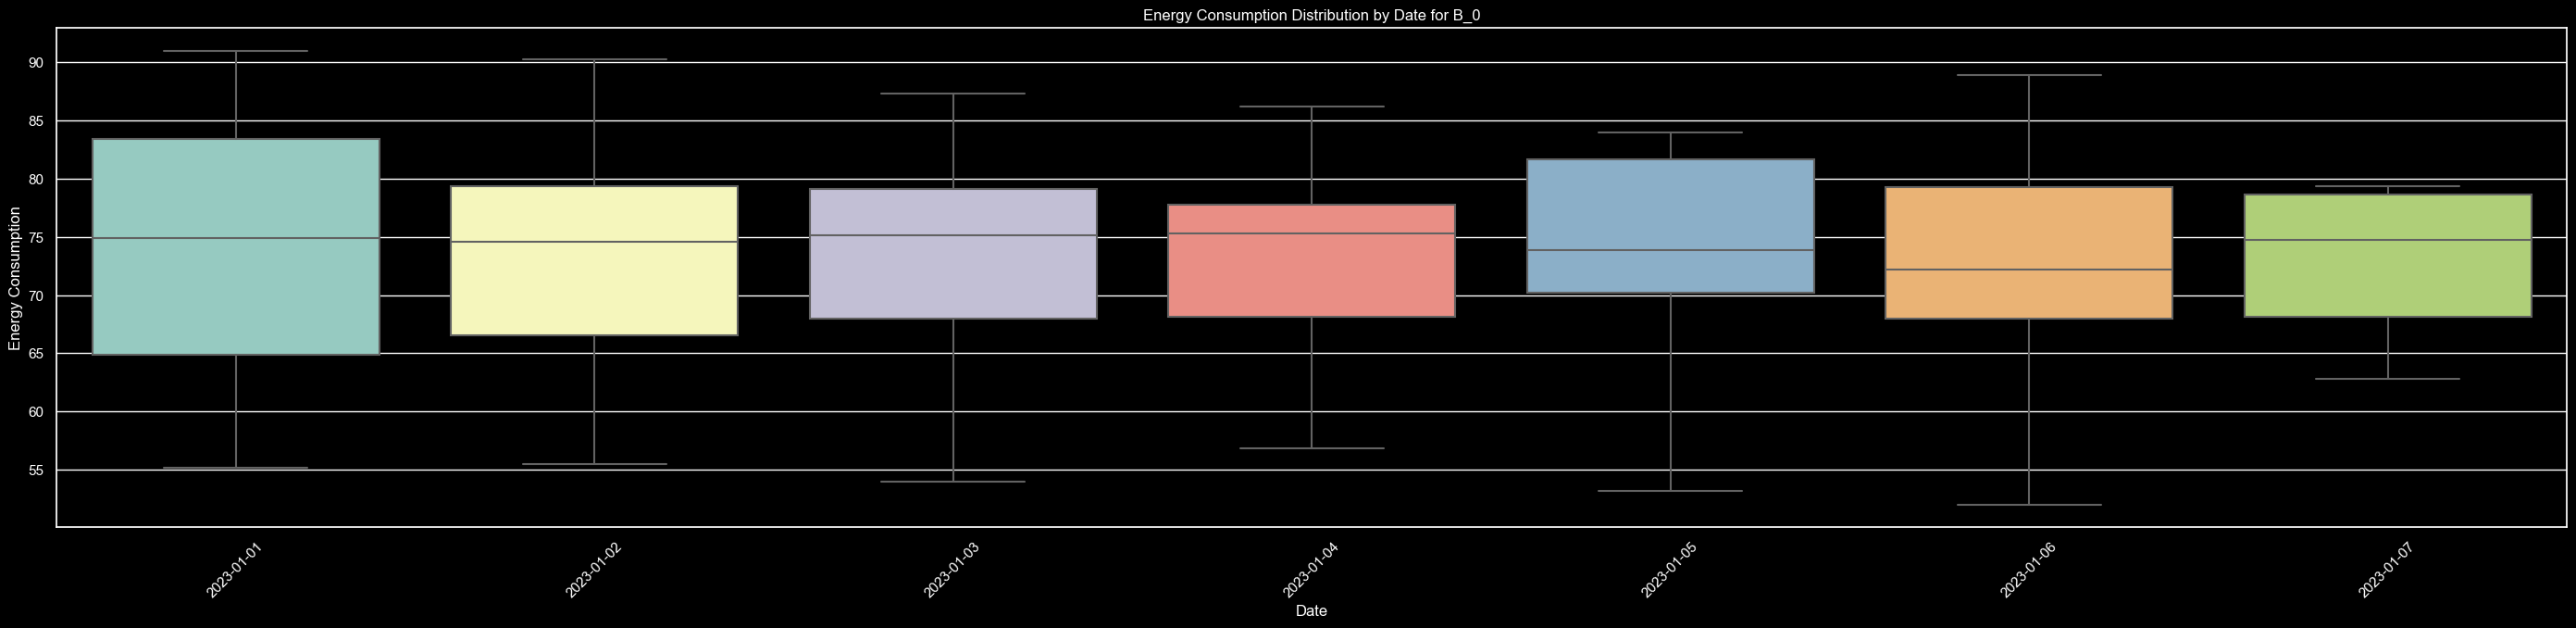

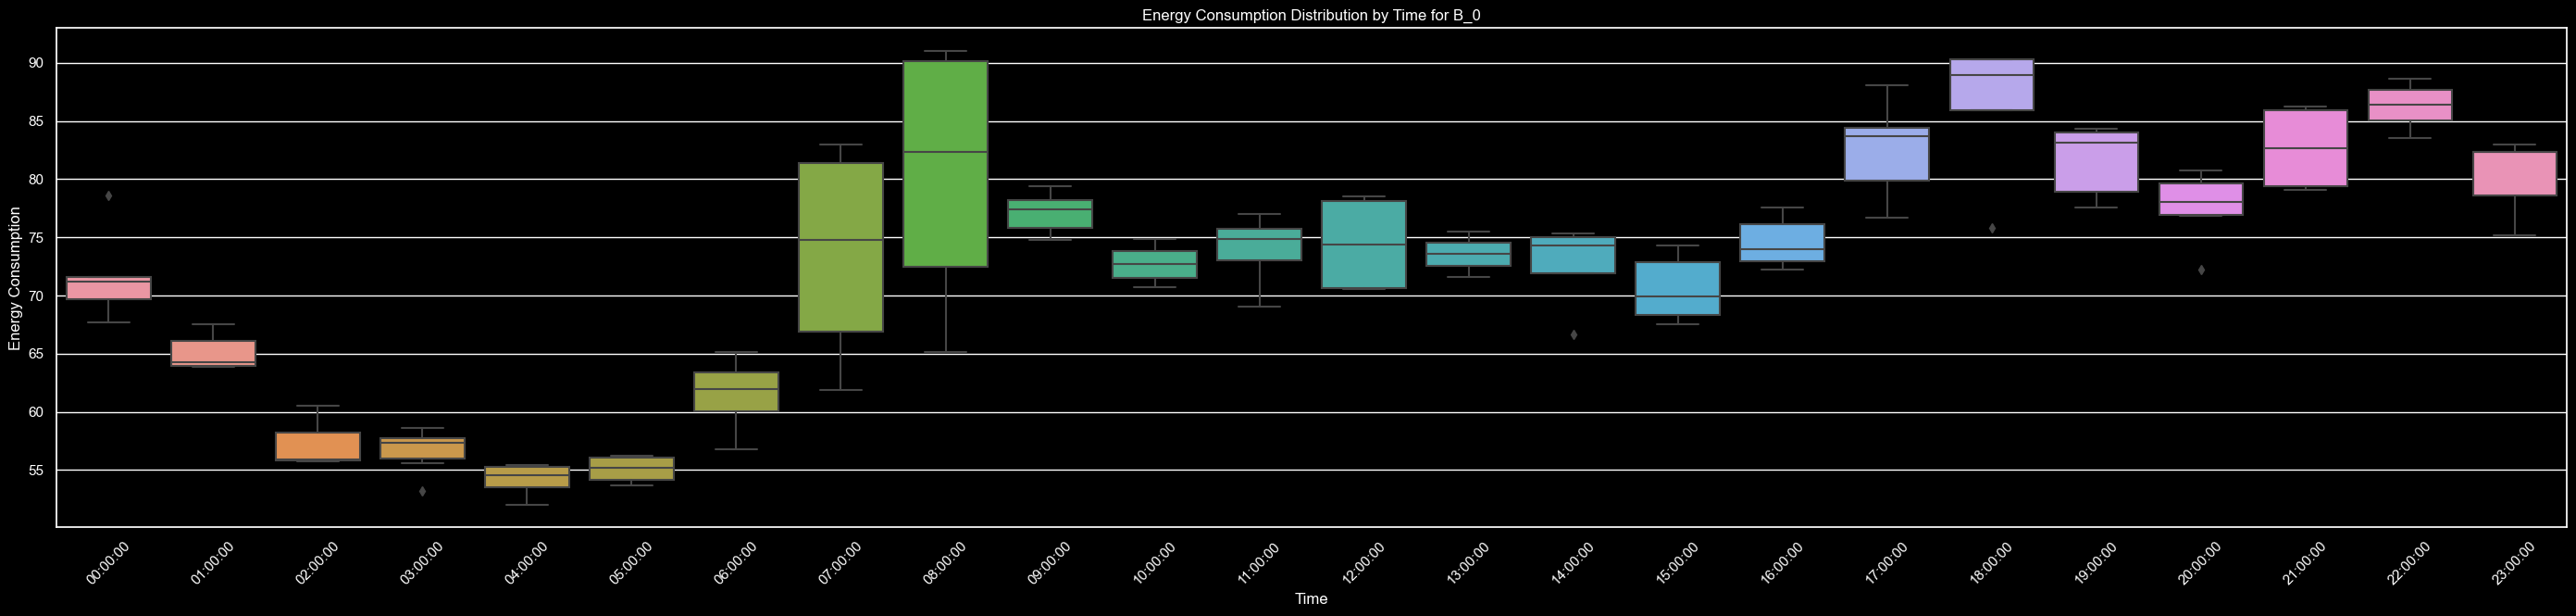

In [222]:

plt.figure(figsize=(35, 7))

# Create the date-based boxplot
df_sorted_date = df.sort_values(by='date')
sns.boxplot(x='date', y='Energy', data=df_sorted_date)

plt.xlabel('Date')
plt.ylabel('Energy Consumption')
plt.title(f'Energy Consumption Distribution by Date for {BS_value}')
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(35, 7))

# Create the time-based boxplot
df_sorted_time = df.sort_values(by='time')
sns.boxplot(x='time', y='Energy', data=df_sorted_time)

plt.xlabel('Time')
plt.ylabel('Energy Consumption')
plt.title(f'Energy Consumption Distribution by Time for {BS_value}')
plt.xticks(rotation=45)
plt.show()

In [223]:
df

,Energy,date,time
Time,,,
2023-01-01 01:00:00,64.275037,2023-01-01,01:00:00
2023-01-01 02:00:00,55.904335,2023-01-01,02:00:00
2023-01-01 03:00:00,57.698057,2023-01-01,03:00:00
2023-01-01 04:00:00,55.156951,2023-01-01,04:00:00
2023-01-01 05:00:00,56.053812,2023-01-01,05:00:00
...,...,...,...
2023-01-07 06:00:00,62.780269,2023-01-07,06:00:00
2023-01-07 09:00:00,74.738416,2023-01-07,09:00:00
2023-01-07 15:00:00,68.161435,2023-01-07,15:00:00


In [224]:
df.dtypes

Energy    float64
date       object
time       object
dtype: object

In [225]:
df_resampled = df.resample('H').mean()

In [226]:
# Fill missing values in the 'Energy' column using forward fill
df_resampled['Energy'].fillna(method='ffill', inplace=True)

In [227]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposed= seasonal_decompose(df_resampled['Energy'],model='additive')

In [228]:
df_resampled.isnull().sum()

Energy    0
dtype: int64

In [229]:
df=df_resampled


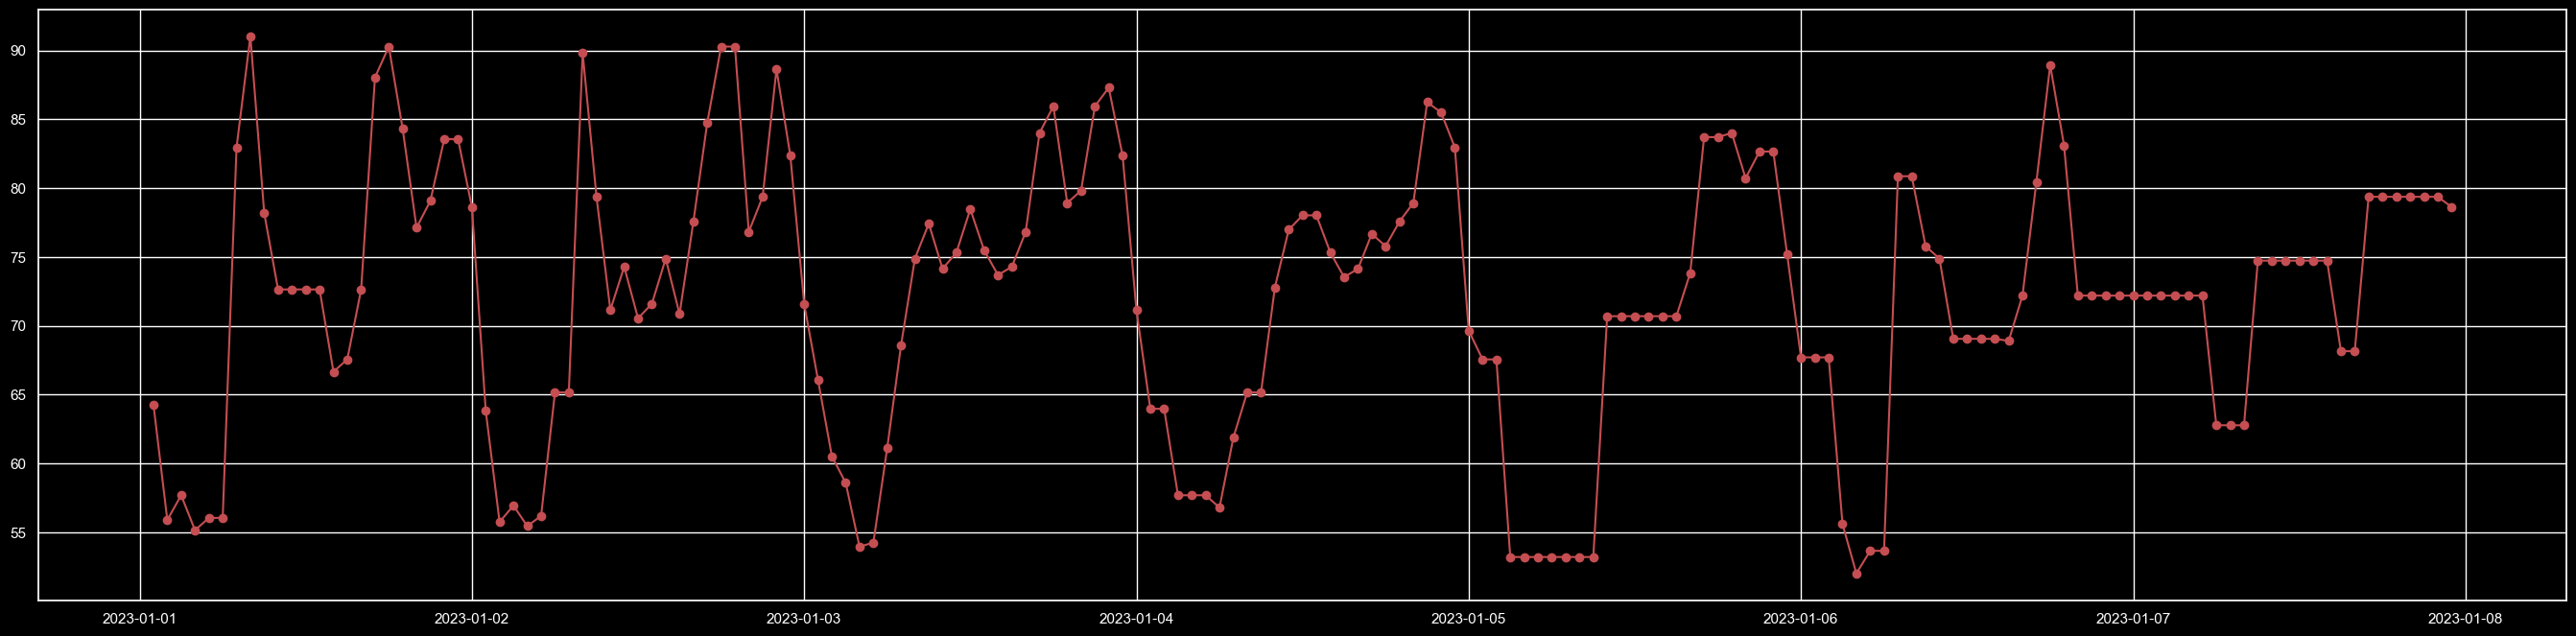

In [230]:
plt.figure(figsize=(34,8))
plt.plot(df['Energy'],marker='o', color='r')

In [231]:
trend= decomposed.trend
seasonal= decomposed.seasonal
residual= decomposed.resid

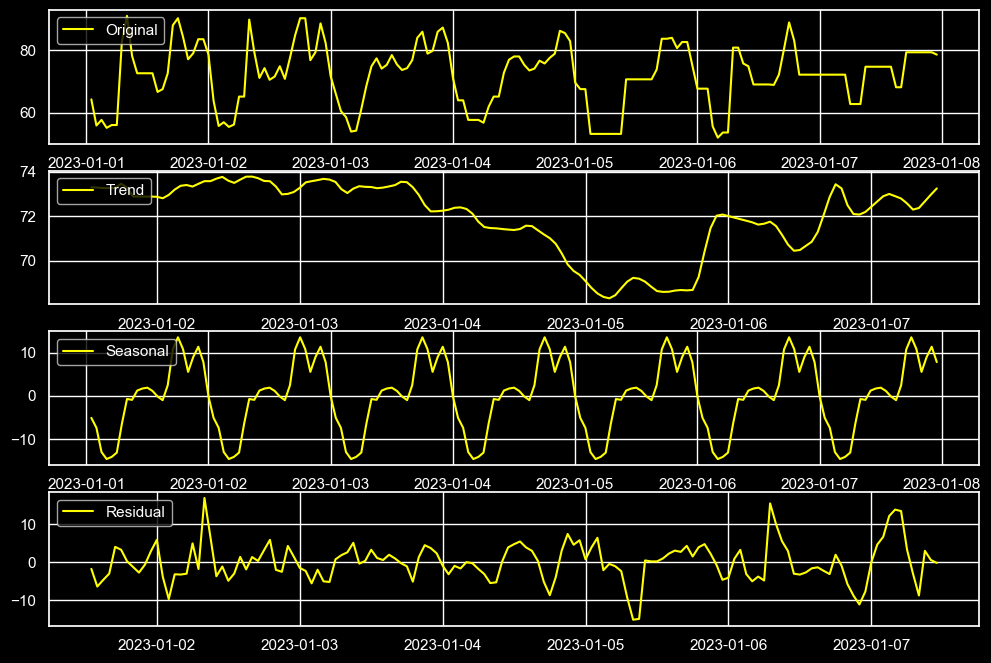

In [232]:
plt.figure(figsize=(12,8))
plt.subplot(411)
plt.plot(df['Energy'], label='Original', color='yellow')
plt.legend(loc='upper left')
plt.subplot(412)
plt.plot(trend, label='Trend', color='yellow')
plt.legend(loc='upper left')
plt.subplot(413)
plt.plot(seasonal, label='Seasonal', color='yellow')
plt.legend(loc='upper left')
plt.subplot(414)
plt.plot(residual, label='Residual', color='yellow')
plt.legend(loc='upper left')
plt.show()

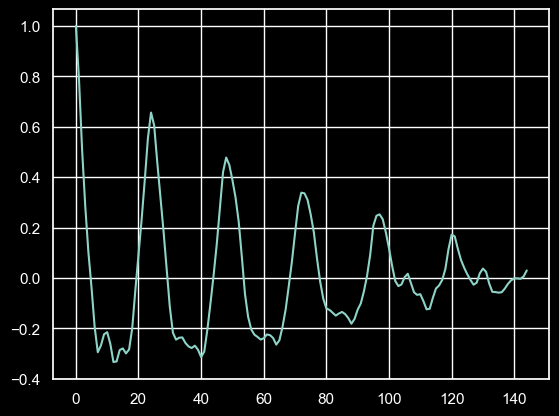

In [233]:
from statsmodels.tsa.stattools import acf

acf_144= acf(df['Energy'],nlags=144)
plt.plot(acf_144)

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

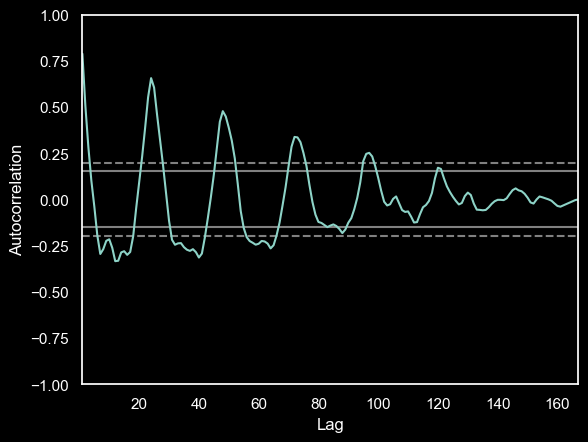

In [234]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(df['Energy'])

--------------------------------------------------------------------------------------------------------------------------------------------------

In [248]:
df=pd.read_csv('ECdata.csv')
df['Time']=pd.to_datetime(df['Time'])
df=df[df['BS']=='B_0']
df.set_index('Time',inplace=True)

In [249]:
df=df.drop('BS', axis=1)

In [262]:
df

,Energy
Time,
2023-01-01 01:00:00,64.275037
2023-01-01 02:00:00,55.904335
2023-01-01 03:00:00,57.698057
2023-01-01 04:00:00,55.156951
2023-01-01 05:00:00,56.053812
...,...
2023-01-07 06:00:00,62.780269
2023-01-07 09:00:00,74.738416
2023-01-07 15:00:00,68.161435


In [250]:
from pmdarima.arima import ADFTest
adf_test= ADFTest(alpha=0.05)
adf_test.should_diff(df['Energy'])

(0.01, False)

In [251]:
from pmdarima.arima import auto_arima
#Autoarima gives us bet model suited for the data
# p - number of autoregressive terms (AR)
# q - Number of moving avergae terms (MA)
# d - number of non-seasonal differences
#p, d, q represent non-seasonal components
#P, D, Q represent seasonal components
arima_model = auto_arima(df['Energy'], start_p = 1, d=1, start_q = 1, 
                          max_p = 5, max_q = 5, max_d=5, m = 12, 
                          start_P = 0, D=1, start_Q=0, max_P=5, max_D=5, max_Q=5,
                          seasonal = True, 
                          trace = True, 
                          error_action ='ignore',   
                          suppress_warnings = True,  
                          stepwise = True, n_fits=50)           
  
# To print the summary 
print(arima_model.summary() ) #Note down the Model and details.
# Model: SARIMAX(0, 1, 1)x(2, 1, [], 12)

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,1,0)[12]             : AIC=745.683, Time=0.06 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=742.348, Time=0.02 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=733.894, Time=0.07 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=725.415, Time=0.07 sec
 ARIMA(0,1,1)(0,1,0)[12]             : AIC=744.002, Time=0.03 sec
 ARIMA(0,1,1)(1,1,1)[12]             : AIC=726.734, Time=0.16 sec
 ARIMA(0,1,1)(0,1,2)[12]             : AIC=726.505, Time=0.25 sec
 ARIMA(0,1,1)(1,1,0)[12]             : AIC=733.890, Time=0.06 sec
 ARIMA(0,1,1)(1,1,2)[12]             : AIC=inf, Time=0.75 sec
 ARIMA(0,1,0)(0,1,1)[12]             : AIC=723.820, Time=0.05 sec
 ARIMA(0,1,0)(1,1,1)[12]             : AIC=725.425, Time=0.09 sec
 ARIMA(0,1,0)(0,1,2)[12]             : AIC=725.322, Time=0.14 sec
 ARIMA(0,1,0)(1,1,0)[12]             : AIC=731.920, Time=0.05 sec
 ARIMA(0,1,0)(1,1,2)[12]             : AIC=inf, Time=0.57 sec
 ARIMA(1,1,0)(0,1,1)[12]             : AI

In [252]:
#Split data into train and test
size = int(len(df) * 0.66)
X_train, X_test = df[0:size], df[size:len(df)]

In [263]:
X_train

,Energy
Time,
2023-01-01 01:00:00,64.275037
2023-01-01 02:00:00,55.904335
2023-01-01 03:00:00,57.698057
2023-01-01 04:00:00,55.156951
2023-01-01 05:00:00,56.053812
...,...
2023-01-04 08:00:00,65.171898
2023-01-04 10:00:00,72.795217
2023-01-04 11:00:00,76.980568


In [253]:
# Fit a SARIMAX(0, 1, 0)x(0, 1, [1], 12) on the training set 
from statsmodels.tsa.statespace.sarimax import SARIMAX 
  
model = SARIMAX(X_train['Energy'],  
                order = (0, 1, 0),  
                seasonal_order =(0, 1, 1, 12)) 
  
result = model.fit() 
result.summary() 


c:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                               Energy   No. Observations:                   74
Model:             SARIMAX(0, 1, 0)x(0, 1, [1], 12)   Log Likelihood                -218.448
Date:                              Wed, 23 Aug 2023   AIC                            440.896
Time:                                      19:41:09   BIC                            445.118
Sample:                                           0   HQIC                           442.550
                                               - 74                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.S.L12      -0.5462      0.175     -3.120      0.002      -0.889      -0.203
sigma2        70.4415     10.141      6.946      0.000      50.565      90.318
===================================================================================
Ljung-Box (L1) (Q):                   0.59   Jarque-Bera (JB):                 5.13
Prob(Q):                              0.44   Prob(JB):                         0.08
Heteroskedasticity (H):               0.29   Skew:                             0.04
Prob(H) (two-sided):                  0.01   Kurtosis:                         4.42
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [254]:
#Train prediction
start_index = 0
end_index = len(X_train)-1
train_prediction = result.predict(start_index, end_index)

In [255]:
#Prediction
start_index = len(X_train)
end_index = len(df)-1
prediction = result.predict(start_index, end_index).rename('Predicted Energy')

c:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


<AxesSubplot:xlabel='Time'>

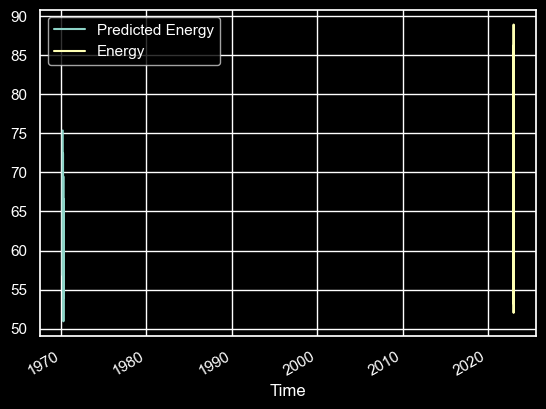

In [256]:
prediction.plot(legend = True) 
X_test['Energy'].plot(legend = True)

In [257]:
import math
from sklearn.metrics import mean_squared_error
# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(X_train, train_prediction))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(X_test, prediction))
print('Test Score: %.2f RMSE' % (testScore))

Train Score: 11.75 RMSE
Test Score: 17.24 RMSE


c:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


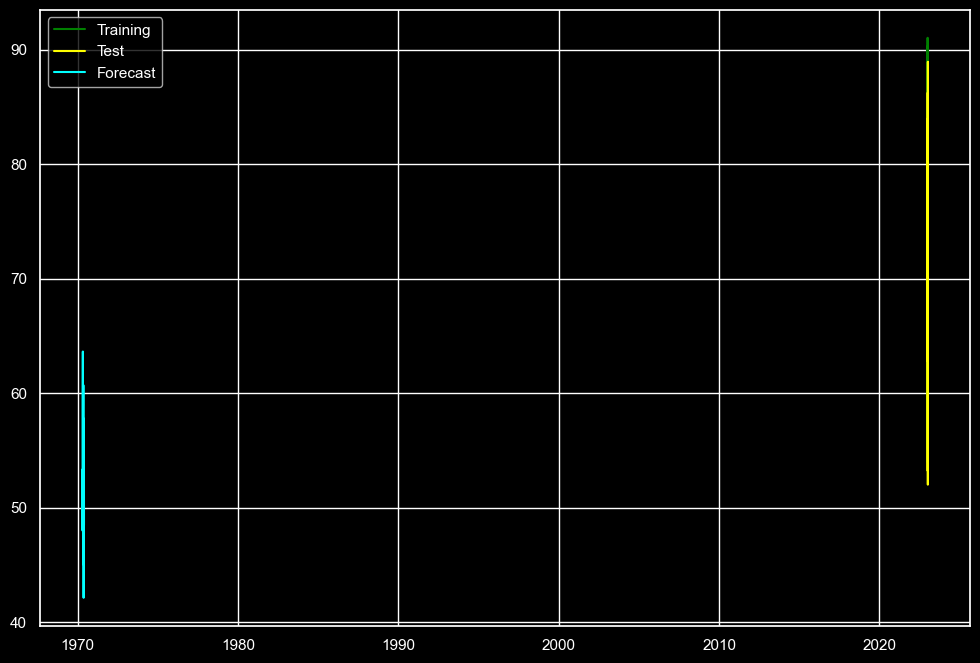

In [258]:
forecast = result.predict(start = len(df),  
                          end = (len(df)-1) + 3 * 12,  
                          typ = 'levels').rename('Forecast') 
  
plt.figure(figsize=(12,8))
plt.plot(X_train, label='Training', color='green')
plt.plot(X_test, label='Test', color='yellow')
plt.plot(forecast, label='Forecast', color='cyan')
plt.legend(loc='upper left')
plt.show()

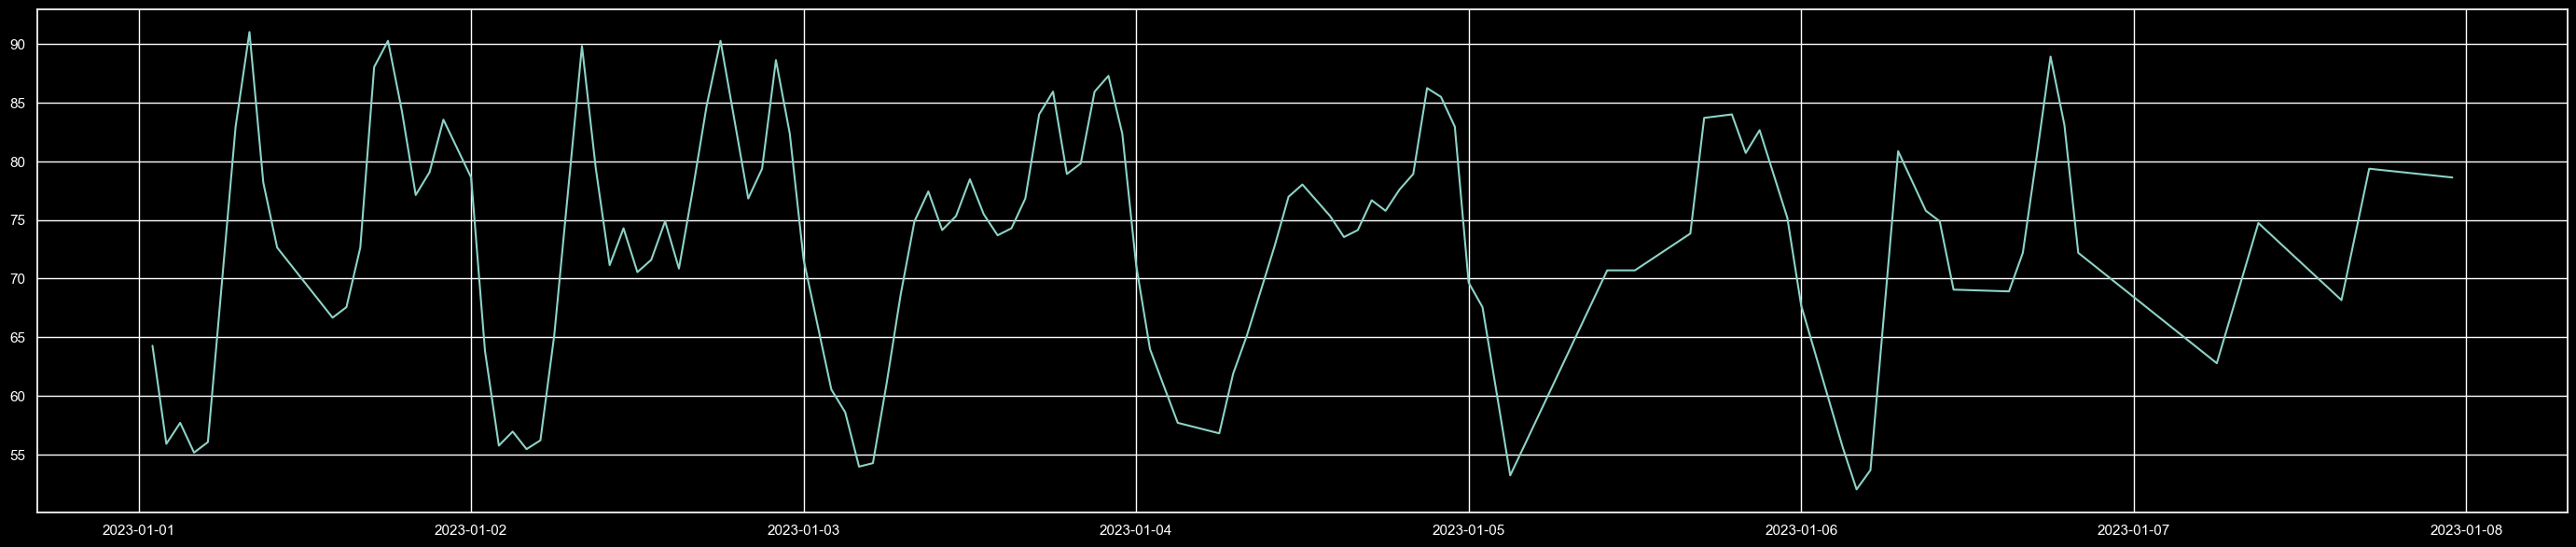

In [261]:
plt.figure(figsize=(35,7))
plt.plot(df)